In [1]:
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

SEED=42

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,recall_score,precision_score,accuracy_score

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

<h1>EDA</h1>
<p>1. General Summary for dataset?  datatype?</p>
<p>2. How many data are there? show vs no_show?</p>
<p>3. Are there missing data?</p>
<p>4. Are there duplicate?</p>
<p>5. What are the trend for each feature?</p>
<p>6. Are there correlation among features?</p>

In [3]:
connect = sqlite3.connect('./data/noshow.db')

In [4]:
df = pd.read_sql_query('SELECT * FROM noshow', connect)

In [5]:
df.head(2)

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
0,94113,0.00,Changi,November,June,25.00,June,27.00,Singapore,Yes,Single,SGD$ 492.98,Website,1,0.00
1,86543,0.00,Orchard,August,November,28.00,November,29.00,Indonesia,Yes,King,SGD$ 1351.22,Website,2,0.00


In [6]:
df.describe(include="all")

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
count,119391.00,119390.00,119390,119390,119390,119390.00,119390,119390.00,119390,119390,97778,94509,119390,119390,119390.00
unique,NaN,NaN,2,12,88,NaN,12,NaN,7,2,4,61867,4,4,NaN
top,NaN,NaN,Changi,June,August,NaN,August,NaN,China,Yes,King,USD$ 585.23,Website,1,NaN
freq,NaN,NaN,79330,10324,13695,NaN,13836,NaN,48590,115580,70496,11,54234,62745,NaN
mean,59695.00,0.37,NaN,NaN,NaN,15.80,NaN,14.25,NaN,NaN,NaN,NaN,NaN,NaN,0.87
std,34465.36,0.48,NaN,NaN,NaN,8.78,NaN,11.06,NaN,NaN,NaN,NaN,NaN,NaN,0.78
min,0.00,0.00,NaN,NaN,NaN,1.00,NaN,-31.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,29847.50,0.00,NaN,NaN,NaN,8.00,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00
50%,59695.00,0.00,NaN,NaN,NaN,16.00,NaN,15.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00
75%,89542.50,1.00,NaN,NaN,NaN,23.00,NaN,23.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00


In [7]:
df.shape

(119391, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119391 entries, 0 to 119390
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   booking_id      119391 non-null  int64  
 1   no_show         119390 non-null  float64
 2   branch          119390 non-null  object 
 3   booking_month   119390 non-null  object 
 4   arrival_month   119390 non-null  object 
 5   arrival_day     119390 non-null  float64
 6   checkout_month  119390 non-null  object 
 7   checkout_day    119390 non-null  float64
 8   country         119390 non-null  object 
 9   first_time      119390 non-null  object 
 10  room            97778 non-null   object 
 11  price           94509 non-null   object 
 12  platform        119390 non-null  object 
 13  num_adults      119390 non-null  object 
 14  num_children    119390 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 13.7+ MB


In [9]:
df.columns.tolist()

['booking_id',
 'no_show',
 'branch',
 'booking_month',
 'arrival_month',
 'arrival_day',
 'checkout_month',
 'checkout_day',
 'country',
 'first_time',
 'room',
 'price',
 'platform',
 'num_adults',
 'num_children']

In [10]:
df.isna().sum()

booking_id            0
no_show               1
branch                1
booking_month         1
arrival_month         1
arrival_day           1
checkout_month        1
checkout_day          1
country               1
first_time            1
room              21613
price             24882
platform              1
num_adults            1
num_children          1
dtype: int64

In [11]:
df[df['no_show'].isnull()]

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
111598,115536,NaN,None,None,None,NaN,None,NaN,None,None,None,None,None,None,NaN


In [12]:
df[df['booking_id']==115536]

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
111598,115536,NaN,None,None,None,NaN,None,NaN,None,None,None,None,None,None,NaN


<h4>Remove null data</h4>

In [13]:
df = df.dropna(subset=['no_show'])
df.shape
df[df['booking_id']==115536]

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children


In [14]:
df.isnull().any()

booking_id        False
no_show           False
branch            False
booking_month     False
arrival_month     False
arrival_day       False
checkout_month    False
checkout_day      False
country           False
first_time        False
room               True
price              True
platform          False
num_adults        False
num_children      False
dtype: bool

<h4>'room' feature have 21612 null value.</h4>

In [15]:
df['room'].isnull().sum()

np.int64(21612)

In [16]:
df[df['room'].isnull()].iloc[100:110]

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
544,117952,1.00,Orchard,September,March,27.00,March,28.00,China,Yes,None,SGD$ 952.78,Website,1,1.00
546,13594,0.00,Changi,December,July,22.00,July,-24.00,Indonesia,Yes,None,USD$ 316.95,Website,1,0.00
551,112565,0.00,Changi,March,May,19.00,May,20.00,China,Yes,None,USD$ 608.15,Email,1,1.00
552,1073,1.00,Changi,November,May,15.00,May,17.00,India,Yes,None,SGD$ 917.17,Email,2,1.00
555,30854,0.00,Orchard,July,October,16.00,October,18.00,Indonesia,Yes,None,USD$ 870.69,Website,two,0.00
566,114838,0.00,Orchard,May,June,2.00,June,3.00,China,Yes,None,SGD$ 633.13,Website,1,1.00
574,24115,0.00,Orchard,March,August,29.00,August,31.00,India,Yes,None,USD$ 500.26,Email,1,0.00
585,22304,0.00,Changi,November,February,17.00,February,19.00,Indonesia,Yes,None,SGD$ 929.17,Email,1,0.00
590,97666,1.00,Changi,March,October,8.00,October,10.00,Indonesia,Yes,None,USD$ 680.63,Website,1,1.00
597,46697,0.00,Changi,September,April,21.00,April,23.00,Malaysia,Yes,None,USD$ 507.02,Website,2,0.00


<h4>'Price' feature has 24881 null value.</h4>

In [17]:
df['price'].isnull().sum()

np.int64(24881)

In [18]:
df[df['price'].isnull()].iloc[50:80]

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
236,44887,1.00,Changi,September,June,27.00,June,29.00,China,Yes,King,None,Website,2,0.00
238,92031,0.00,Changi,October,June,26.00,June,27.00,China,Yes,King,None,Email,2,0.00
240,117155,0.00,Orchard,April,June,9.00,June,12.00,Singapore,Yes,King,None,Website,1,0.00
245,78556,0.00,Orchard,June,October,18.00,October,20.00,Singapore,Yes,King,None,Agent,1,2.00
246,84851,1.00,Changi,September,May,18.00,May,20.00,Australia,Yes,King,None,Agent,2,1.00
257,33365,0.00,Orchard,March,April,25.00,April,27.00,Indonesia,Yes,King,None,Website,2,0.00
258,24989,0.00,Orchard,May,May,11.00,May,14.00,Indonesia,Yes,King,None,Agent,1,0.00
259,49151,1.00,Changi,September,February,25.00,February,28.00,China,Yes,King,None,Website,1,0.00
268,35325,0.00,Changi,December,November,21.00,November,22.00,Indonesia,Yes,King,None,Email,2,2.00
269,438,0.00,Orchard,March,October,12.00,October,14.00,Australia,Yes,Queen,None,Website,1,1.00


<h2 style='color:red'>Summary 1 - remove all null data</h2>
<p>We have 119391 customers, each customer has 15 data (features) about their hotel booking</p>
<p>One customer entry (booking_id: 1155356) is null. Hence this data is removed.</p>
<p>There are still two columns with many 'None' values, which are 'room' and 'price'. I will keep them for now.</p>

In [19]:
for column in df.columns[1:]:
    print(f"{column} : {df[column].unique()}")

no_show : [0. 1.]
branch : ['Changi' 'Orchard']
booking_month : ['November' 'August' 'March' 'September' 'July' 'January' 'October' 'June'
 'December' 'April' 'May' 'February']
arrival_month : ['June' 'November' 'February' 'October' 'September' 'March' 'May' 'August'
 'July' 'January' 'April' 'December' 'ApRiL' 'OcTobeR' 'JuNe' 'JulY'
 'ApriL' 'OctOber' 'DecembEr' 'SeptEmber' 'JanUary' 'JUne' 'FeBruary'
 'JanuarY' 'DEcember' 'SePtember' 'DecembeR' 'MaY' 'NoVember' 'JUly'
 'JunE' 'JuLy' 'FebrUary' 'NOvember' 'SeptemBer' 'OctobeR' 'DecemBer'
 'MarCh' 'AuguSt' 'AugusT' 'APril' 'SepTember' 'NovembEr' 'FEbruary'
 'DeceMber' 'AuGust' 'SepteMber' 'FebruaRy' 'OctoBer' 'JanuaRy' 'MarcH'
 'ApRil' 'AUgust' 'JanuAry' 'NOveMber' 'MaRch' 'AprIl' 'MAy' 'NovemBer'
 'DecEmber' 'MArch' 'JaNuary' 'NovembeR' 'SeptembEr' 'FebruarY'
 'SeptembeR' 'OcTober' 'DeCember' 'FebruAry' 'AugUst' 'NovEmber'
 'NoveMber' 'OctobEr' 'OCtober' 'SEptember' 'JAnuary' 'SeptEMber' 'MAY'
 'FebRuary' 'FeBruarY' 'OCTober' 'JUnE' 

In [20]:
df[df.duplicated()]

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children


<h4>Create 'currency' and 'price_in_sgd'</h4>

In [21]:
df['arrival_month'] = df['arrival_month'].apply(lambda x: x.lower().capitalize())
df['num_adults'] = df['num_adults'].apply(lambda x : '1' if x == 'one' else x)
df['num_adults'] = df['num_adults'].apply(lambda x : '2' if x == 'two' else x)
df['currency'] = df['price'].apply(lambda x : None if x is None else x.split('$')[0])
df['price_in_sgd'] = df['price'].apply(lambda x : 0 if x is None else x.split('$ ')[1])
df['price_in_sgd'] = df['price_in_sgd'].astype('float64')
df['price_in_sgd'] = df.apply(lambda row : row.price_in_sgd * 1.32 if row.currency == "USD" else row.price_in_sgd, axis=1)

<h4>Nullify negative checkout_day</h4>

In [22]:
df[df['checkout_day'] < 0].shape[0]

5696

In [23]:
df[df['checkout_day'] < 0].iloc[40:43]

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children,currency,price_in_sgd
846,2680,0.00,Changi,May,July,14.00,July,-16.00,Japan,Yes,None,SGD$ 815.56,Website,2,0.00,SGD,815.56
850,99685,0.00,Changi,October,October,29.00,October,-30.00,China,No,Single,USD$ 378.09,Agent,1,0.00,USD,499.08
910,44451,0.00,Changi,April,August,2.00,August,-4.00,Indonesia,Yes,King,None,Website,1,2.00,None,0.00


In [24]:
#Nullify 'negative' checkout day
#df['checkout_day'] = df['checkout_day'].apply(lambda x: 0 if x < 0 else x)

#Rectify 'negative' checkout day
df['checkout_day'] = df['checkout_day'].apply(lambda x: x * -1 if x < 0 else x)

In [25]:
df[df['checkout_day'] < 0]

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children,currency,price_in_sgd


In [26]:
df[['num_adults','num_children','arrival_day','checkout_day']] = df[['num_adults','num_children','arrival_day','checkout_day']].astype(int)
df[['arrival_month','arrival_day']] = df[['arrival_month','arrival_day']].astype('string')
df[['checkout_month','checkout_day']] = df[['checkout_month','checkout_day']].astype('string')

<h4>Create 'stay_duration_days' - How long is the hotel stay? (in days) </h4>

In [27]:
#Assume the year as 2024 for those arrived on February29 (leap year)
df['arrival_month_day'] = '2024' + df['arrival_month'].astype('string') +  df['arrival_day']
df['checkout_month_day'] = '2024' + df['checkout_month'].astype('string') + df['checkout_day']

In [28]:
#Calculate stay_duration_days
df['stay_duration_days'] = pd.to_datetime(df['checkout_month_day'], format = "%Y%B%d", errors='coerce') - pd.to_datetime(df['arrival_month_day'], format = "%Y%B%d", errors='coerce')
df['stay_duration_days'] = df['stay_duration_days'].dt.days

In [29]:
#Adding 366 (leap year) to rectify the stay_duration_days for those arrived in December and checkout in January (cross year)
df['stay_duration_days'] = df.apply(lambda row : row.stay_duration_days + 366 if (row.arrival_month == "December") & (row.checkout_month == "January") else row.stay_duration_days, axis=1)

<h4>Create 'advance_booking_month' - How early was the booking made? (in month)</h4>

In [30]:
df['advance_booking_month'] = pd.to_datetime(df['arrival_month'], format='%B').dt.month - pd.to_datetime(df['booking_month'],format='%B').dt.month

In [31]:
#Recify 'advance_booking_month by adding 12 to those booking in previous year.
df['advance_booking_month'] = df['advance_booking_month'].apply(lambda x : x + 12 if x < 0 else x)

In [32]:
df[df['advance_booking_month'] == 0]

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,...,price,platform,num_adults,num_children,currency,price_in_sgd,arrival_month_day,checkout_month_day,stay_duration_days,advance_booking_month
19,3158,0.00,Orchard,March,March,30,March,31,China,Yes,...,USD$ 1056.7,Website,1,0,USD,1394.84,2024March30,2024March31,1,0
24,60146,0.00,Changi,October,October,9,October,10,Indonesia,Yes,...,SGD$ 515.01,Website,1,0,SGD,515.01,2024October9,2024October10,1,0
49,56279,0.00,Changi,August,August,20,August,21,India,Yes,...,SGD$ 892.73,Website,2,0,SGD,892.73,2024August20,2024August21,1,0
59,99490,0.00,Changi,September,September,27,September,28,Japan,Yes,...,None,Phone,2,2,None,0.00,2024September27,2024September28,1,0
67,46485,0.00,Orchard,October,October,8,October,22,Australia,Yes,...,USD$ 817.51,Website,2,0,USD,1079.11,2024October8,2024October22,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119360,99344,0.00,Orchard,May,May,30,May,31,China,Yes,...,USD$ 1049.19,Website,2,0,USD,1384.93,2024May30,2024May31,1,0
119366,15973,0.00,Changi,December,December,31,January,2,Singapore,Yes,...,USD$ 637.6,Website,2,0,USD,841.63,2024December31,2024January2,2,0
119372,30262,0.00,Orchard,December,December,2,December,4,Indonesia,Yes,...,USD$ 823.1,Email,1,1,USD,1086.49,2024December2,2024December4,2,0
119378,91840,0.00,Orchard,September,September,15,September,16,Australia,Yes,...,SGD$ 1331.2,Agent,2,0,SGD,1331.20,2024September15,2024September16,1,0


<h2 style='color:red'>Summary2 - nullify 'invalid' entry, engineer new features</h2>
<p>Feature: 'arrival_month' has different string formats for  which has later been standardized.</p>
<p>Feature: 'checkout_day' has invalid (negative) day, it accounts for 4.7% dataset or 5696 entry. It is likely due to data error, all the negative day was nullified. Created new feature 'stay_duration_days' and 'advance_booking_month'</p>
<p>Feature: 'price' in USD is converted to SGD (multiply by 1.32). Created a new column 'price_in_sgd' and 'currency'</p>
<p>No duplicate is detected</p>

<h2 style='color:red'>Assumption</h2>
<p>1. The year of arrival is in leap year as some arrival day is February 29.</p>
<p>2. The advance booking can only be made up to 12 months prior arrival.</p>

<h4>Each month, there is around 9k to 10k customer make bookings.</h4>

In [33]:
Month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['booking_month'] = pd.Categorical(df['booking_month'],Month_order,ordered=True)
df['arrival_month'] = pd.Categorical(df['arrival_month'],Month_order,ordered=True)
df['checkout_month'] = pd.Categorical(df['checkout_month'],Month_order,ordered=True)

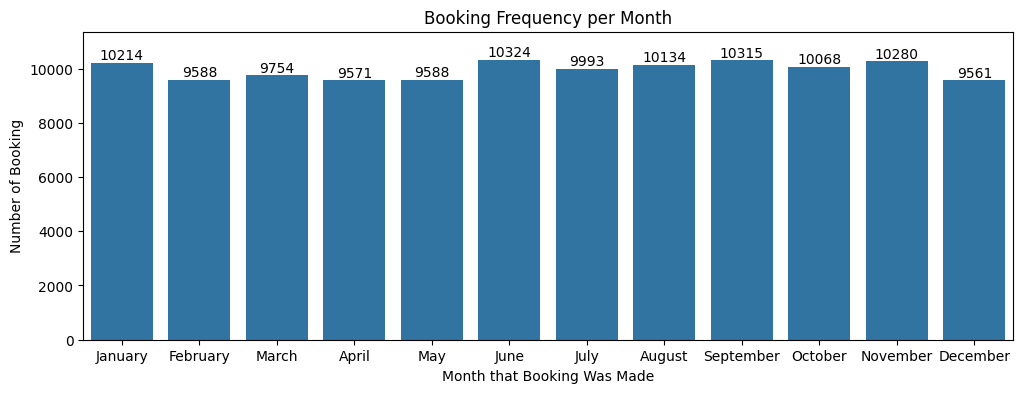

In [34]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x=df['booking_month'], order=Month_order)
ax.set_title('Booking Frequency per Month')
ax.set_xlabel('Month that Booking Was Made')
ax.set_ylabel('Number of Booking')

# Adding labels to the chart
ax.bar_label(ax.containers[0], label_type='edge')
# Adjusting margins for clarity
ax.margins(y=0.1)

In [35]:
df.booking_month.value_counts()

booking_month
June         10324
September    10315
November     10280
January      10214
August       10134
October      10068
July          9993
March         9754
February      9588
May           9588
April         9571
December      9561
Name: count, dtype: int64

<h4>Most booking was made for arrival in May, July, August, while the least was made for arrival in January.The no-show rate is about 30-40% each month, meaning there is 30-40% of guests who fail to turn up for their booking.</h4>

Text(0.5, 0, 'Month that Customer Plans To Arrive')

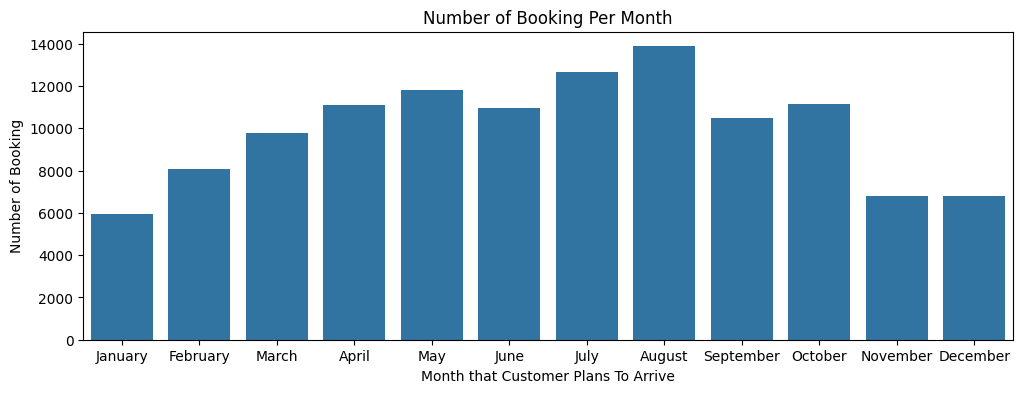

In [36]:
plt.figure(figsize=(12,4))
sns.countplot(x=df['arrival_month'], order=Month_order)
plt.title('Number of Booking Per Month')
plt.ylabel('Number of Booking')
plt.xlabel('Month that Customer Plans To Arrive')

/var/folders/x1/1y5syh4x77n7xm6zlbw32hcr0000gn/T/ipykernel_1761/1629677242.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gf = df.groupby('arrival_month').no_show.value_counts().reset_index().pivot(


no_show,0.00,1.00
arrival_month,,
January,69.52,30.48
February,66.58,33.42
March,67.85,32.15
April,59.20,40.80
May,60.33,39.67
June,58.54,41.46
July,62.55,37.45
August,62.25,37.75
September,60.83,39.17


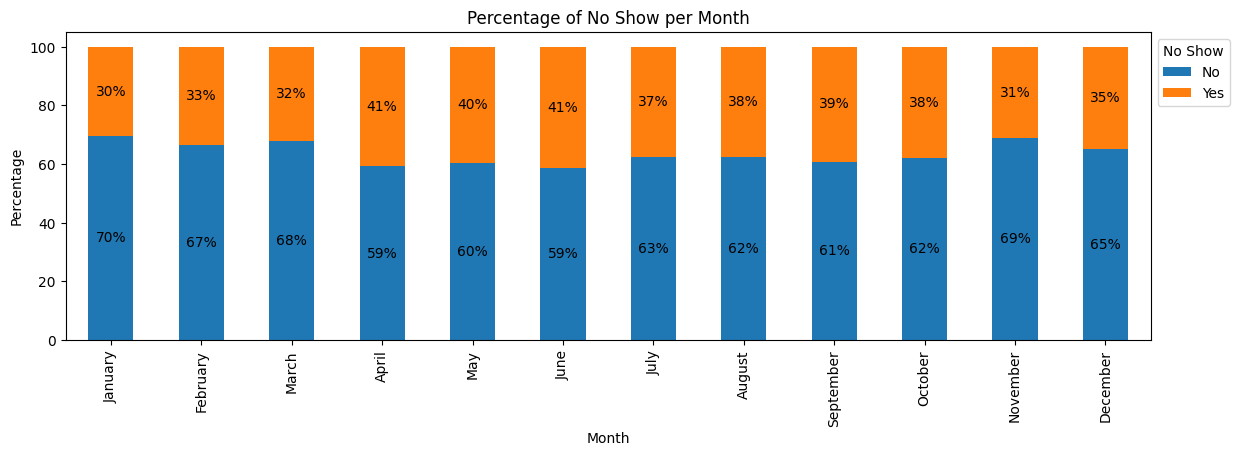

In [37]:
#Table for stacked bar
gf = df.groupby('arrival_month').no_show.value_counts().reset_index().pivot(
    columns='no_show',
    index='arrival_month',
    values='count')
#Order by January through December
gf = gf.reindex(Month_order)
#Calculate percentage, each month sum to 100%
gf = gf.apply(lambda x : x/sum(x) * 100, axis=1)

ax = gf.plot(kind="bar", stacked=True, figsize=(14,4))
ax.legend(['No','Yes'],bbox_to_anchor=(1, 1), loc='upper left', title='No Show')
ax.set_title('Percentage of No Show per Month')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')

# Adding labels to the chart
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:0.0f}%' if x > 0 else '', label_type='center')

gf

<h4>Changi branch has much higher no-show rate (42%) compared to Orchard branch (28%)</h4>

no_show,0.00,1.00
branch,,
Changi,58.27,41.73
Orchard,72.24,27.76


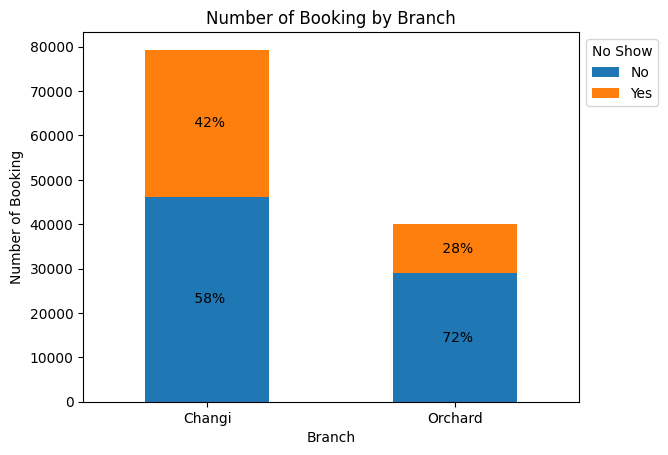

In [38]:
#First table for count graph
gf = df.groupby('branch').no_show.value_counts().reset_index().pivot(
    columns='no_show',
    index='branch',
    values='count')
#Second table for percentage labelling
gf_percent = gf.apply(lambda x: x / sum(x) * 100, axis=1)

ax = gf.plot(kind='bar', stacked=True)
ax.legend(['No','Yes'],bbox_to_anchor=(1, 1), loc='upper left', title='No Show')
plt.xticks(rotation=0)
ax.set_title('Number of Booking by Branch')
ax.set_ylabel('Number of Booking')
ax.set_xlabel('Branch')

for c in ax.containers:
    # get the current segment label (a string); corresponds to column / legend
    label = c.get_label()

    # create custom labels with the bar height and the percent from the gf_percent column
    # the column labels in gf_percent and gf are float, so convert label to float
    labels = [f'{x: 0.0f}%' if v.get_height() > 0 else '' for v, x in zip(c, gf_percent[float(label)])]
    
    # add the annotation
    ax.bar_label(c, labels=labels, label_type='center')

gf_percent

In [39]:
df.groupby('branch').no_show.value_counts()

branch   no_show
Changi   0.00       46228
         1.00       33102
Orchard  0.00       28938
         1.00       11122
Name: count, dtype: int64

In [40]:
df.groupby('branch').no_show.value_counts(normalize=True)

branch   no_show
Changi   0.00      0.58
         1.00      0.42
Orchard  0.00      0.72
         1.00      0.28
Name: proportion, dtype: float64

<h4>Among countries, China citizen has the highest no-show rate (57%), followed by Malaysian (35%) and Indonesian (27%). On contrary, 83% of Japanese check in on arrival day, which is the highest among all countries.</h4>

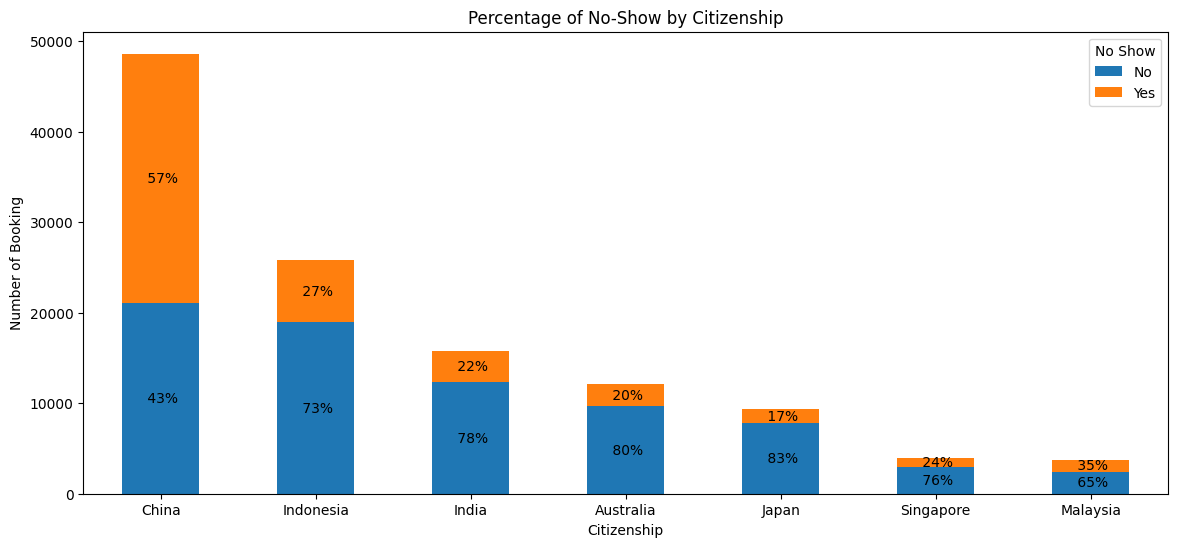

In [41]:
#First table for count number
gf = df.groupby('country').no_show.value_counts().reset_index().pivot(
    index='country',
    columns='no_show',
    values='count')
#Arrange country by number from high to low
gf_order = gf.sum(axis=1).sort_values(ascending=False).index
#Rearrange country by that order
gf = gf.reindex(gf_order)
#Second table for percentage number
gf_percent = gf.apply(lambda x: x/sum(x) * 100, axis=1)

ax = gf.plot(kind='bar', stacked=True, figsize=(14,6))
ax.set_title('Percentage of No-Show by Citizenship')
ax.set_ylabel('Number of Booking')
ax.set_xlabel('Citizenship')
ax.legend(['No','Yes'], title="No Show")
plt.xticks(rotation=0)

# Adding labels to the chart
for c in ax.containers:
    
    # get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # create custom labels with the bar height and the percent from the gf_percent column
    # the column labels in gf_percent and gf are float, so convert label to float
    labels = [f'{x: 0.0f}%' if v.get_height() > 0 else '' for v, x in zip(c, gf_percent[float(label)])]
    
    # add the annotation
    ax.bar_label(c, labels=labels, label_type='center')

In [42]:
df.groupby('country').no_show.value_counts(normalize=True)

country    no_show
Australia  0.00      0.80
           1.00      0.20
China      1.00      0.57
           0.00      0.43
India      0.00      0.78
           1.00      0.22
Indonesia  0.00      0.73
           1.00      0.27
Japan      0.00      0.83
           1.00      0.17
Malaysia   0.00      0.65
           1.00      0.35
Singapore  0.00      0.76
           1.00      0.24
Name: proportion, dtype: float64

<h4>Most customers are first-timer (97%). The no-show rate is higher in First-timer (38%) compared to Returning Visitor (14%).</h4>

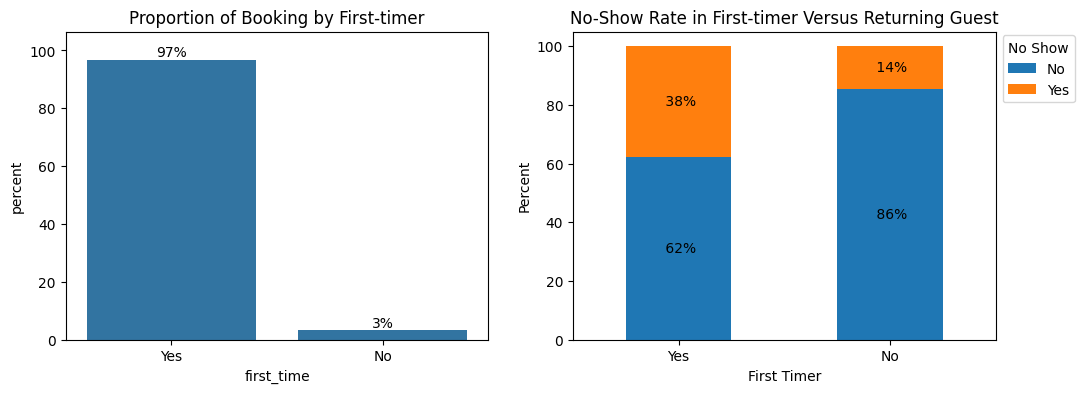

In [43]:
fig ,ax = plt.subplots(1,2,figsize=(12,4))

#Proportion of Booking By First-Timer
sns.countplot(x=df['first_time'], stat='percent', ax=ax[0])
ax[0].set_title('Proportion of Booking by First-timer')

# Adding labels to the chart
ax[0].bar_label(ax[0].containers[0], fmt=lambda x: f'{x:0.0f}%', label_type='edge')
# Adjusting margins for clarity
ax[0].margins(y=0.1)

#Show-up Rate in First-timer Versus Returning Guest
gf = df.groupby('first_time').no_show.value_counts().reset_index().pivot(
    columns='no_show',
    index='first_time',
    values='count')
gf = gf.reindex(['Yes','No'])
gf = gf.apply(lambda x : x / sum(x) * 100, axis=1)
gf.plot(kind='bar', stacked=True, ax=ax[1])

ax[1].set_title('No-Show Rate in First-timer Versus Returning Guest')
ax[1].set_ylabel('Percent')
ax[1].set_xlabel('First Timer')
plt.xticks(rotation=0)
ax[1].legend(['No','Yes'],bbox_to_anchor=(1, 1.01), loc='upper left', title='No Show') 

for c in ax[1].containers:
    ax[1].bar_label(c, fmt=lambda x: f'{x: 0.0f}%', label_type='center')

In [44]:
df['first_time'].value_counts(normalize=True)

first_time
Yes   0.97
No    0.03
Name: proportion, dtype: float64

<h4>Booking are made through four platforms: Website (45%), Email (27%), Agent (18%), Phone (9%)</h4>

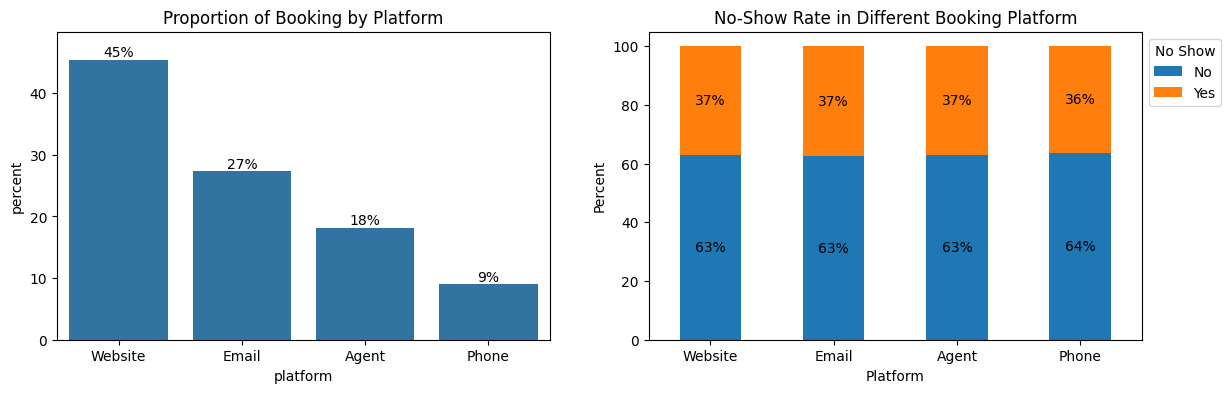

In [45]:
fig, ax = plt.subplots(1,2,figsize=(14,4))

#Proportion of Booking by Platform
order = df['platform'].value_counts().sort_values(ascending=False).index
sns.countplot(x=df['platform'], stat='percent', order=order, ax = ax[0])
ax[0].set_title('Proportion of Booking by Platform')

# Adding labels to the chart
ax[0].bar_label(ax[0].containers[0], fmt=lambda x: f'{x:0.0f}%', label_type='edge')
# Adjusting margins for clarity
ax[0].margins(y=0.1)


#Show-up Rate in Different Booking Platform
gf = df.groupby('platform').no_show.value_counts().reset_index().pivot(
    columns='no_show',
    index='platform',
    values='count').sort_values(1,ascending=False)
gf = gf.apply(lambda x: x/sum(x) *100, axis=1)

gf.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].legend(['No','Yes'], title='No Show', loc='upper left', bbox_to_anchor=(1,1))
ax[1].set_title('No-Show Rate in Different Booking Platform')
ax[1].set_xlabel('Platform')
ax[1].set_ylabel('Percent')
plt.xticks(rotation=0)

for c in ax[1].containers:
    ax[1].bar_label(c, fmt=lambda x: f'{x:0.0f}%', label_type='center')

In [46]:
df['platform'].value_counts(normalize=True)

platform
Website   0.45
Email     0.27
Agent     0.18
Phone     0.09
Name: proportion, dtype: float64

<h4>Most guests are single adult with 1 kid (23.1%) or single-adult traveller  without kid (22.6%). But there isn't much difference in the no-show rate based on traveller numbers.</h4>

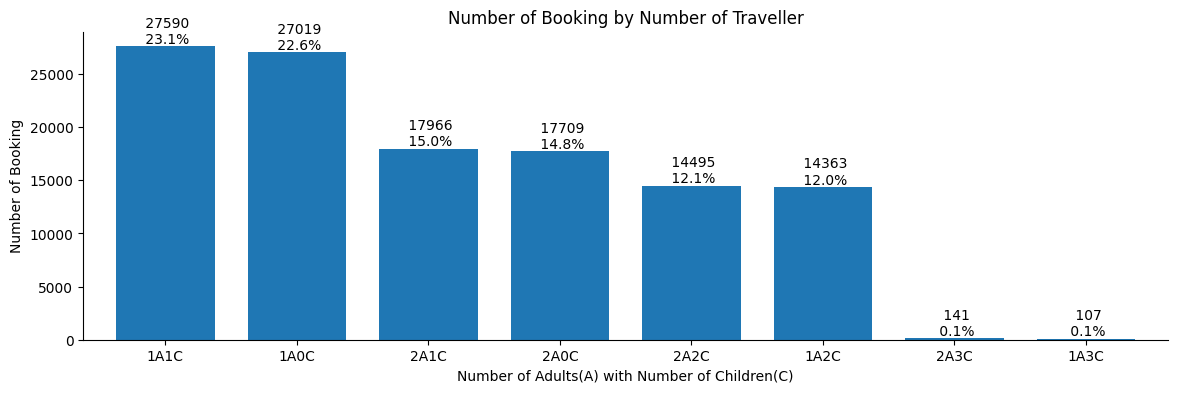

In [47]:
#FirstGraph - table for count number of traveller
gf = df.groupby('num_adults').num_children.value_counts().reset_index()
gf.num_adults = gf.num_adults.astype(str) + pd.Series(['A']*len(gf.num_adults))
gf.num_children = gf.num_children.astype(str) + pd.Series(['C']*len(gf.num_children))
gf['num_traveller'] = gf.apply(lambda x: x.num_adults + x.num_children, axis=1)
gf = gf[['num_traveller', 'count']].sort_values('count',ascending=False)
gf['percent'] = gf['count']/sum(gf['count']) *100
gf = gf.set_index('num_traveller')

#FirstGraph - Number of Booking by Number of Traveller
ax = gf.plot(kind='bar', legend=False, figsize=(14,4), width=.75, y='count') #specify y so that only the bar of 'count' is visible and bar of'percent' is hidden.
ax.set_title('Number of Booking by Number of Traveller')
ax.set_ylabel('Number of Booking')
ax.set_xlabel('Number of Adults(A) with Number of Children(C)')
ax.set_xticks(ax.get_xticks()) #keep current xticks position
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) #keep current xticks labels but change rotation
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#FirstGraph - label each bar with percentage
labels = [f' {v.get_height()}\n {gf.iloc[i, 1]:0.1f}%' for i, v in enumerate(ax.containers[0])]
ax.bar_label(ax.containers[0], labels=labels, label_type='edge')

plt.show()

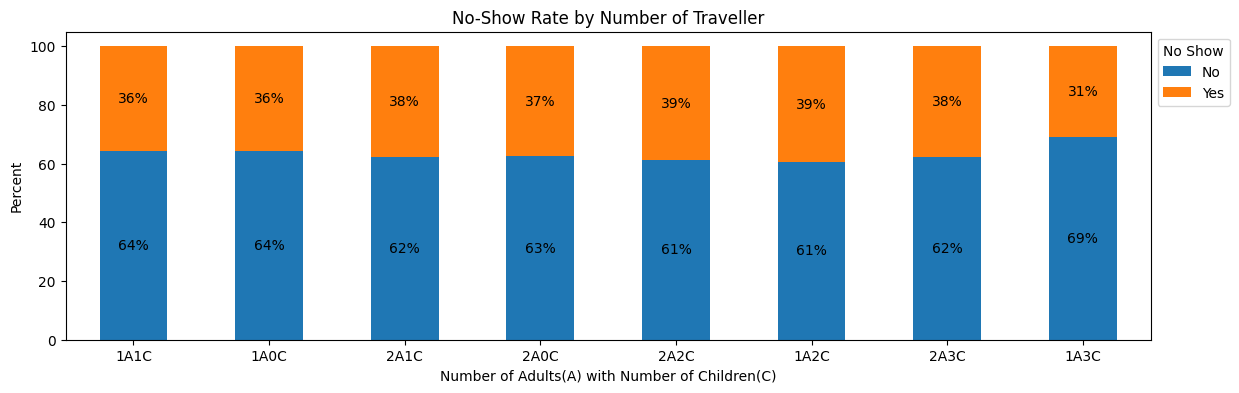

In [48]:
#SecondGraph - Percent table 
gf = df.groupby(['num_adults','num_children']).no_show.value_counts().reset_index()
gf.num_adults = gf.num_adults.astype(str) + pd.Series(['A']*len(gf.num_adults))
gf.num_children = gf.num_children.astype(str) + pd.Series(['C']*len(gf.num_children))
gf['num_traveller'] = gf.apply(lambda x: x.num_adults + x.num_children, axis=1)
gf = gf[['num_traveller', 'no_show', 'count']].pivot(
    columns='no_show',
    index='num_traveller',
    values='count')
#SecondGraph - get order for index from high to low
gf_order = gf.sum(axis=1).sort_values(ascending=False).index
gf = gf.reindex(gf_order)
gf = gf.apply(lambda x : x / sum(x) * 100, axis=1)

#SecondGraph - 
ax = gf.plot(kind='bar', stacked=True, figsize=(14,4))
ax.set_title('No-Show Rate by Number of Traveller')
ax.set_ylabel('Percent')
ax.set_xlabel('Number of Adults(A) with Number of Children(C)')
ax.legend(['No','Yes'], title='No Show', loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=0)

#SecondGraph - label each bar with percentage
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:0.0f}%', label_type='center')

In [49]:
df.groupby('num_adults').num_children.value_counts()

num_adults  num_children
1           1               27590
            0               27019
            2               14363
            3                 107
2           1               17966
            0               17709
            2               14495
            3                 141
Name: count, dtype: int64

In [50]:
df.groupby(['num_adults']+['num_children']).no_show.value_counts(normalize=True)

num_adults  num_children  no_show
1           0             0.00      0.64
                          1.00      0.36
            1             0.00      0.64
                          1.00      0.36
            2             0.00      0.61
                          1.00      0.39
            3             0.00      0.69
                          1.00      0.31
2           0             0.00      0.63
                          1.00      0.37
            1             0.00      0.62
                          1.00      0.38
            2             0.00      0.61
                          1.00      0.39
            3             0.00      0.62
                          1.00      0.38
Name: proportion, dtype: float64

In [51]:
df['traveller_number'] = df['num_adults']+df['num_children']
df.groupby('traveller_number').no_show.value_counts(normalize=True)

traveller_number  no_show
1                 0.00      0.64
                  1.00      0.36
2                 0.00      0.64
                  1.00      0.36
3                 0.00      0.62
                  1.00      0.38
4                 0.00      0.61
                  1.00      0.39
5                 0.00      0.62
                  1.00      0.38
Name: proportion, dtype: float64

<h4>No-Show rate is the highest for 'King' Room (39%)</h4>

In [52]:
def countTable(feature, response):
    table = df.groupby(feature)[response].value_counts().reset_index().pivot(
        columns='no_show',
        index=feature,
        values='count')
    return table

def percentTable(feature, response):
    table = countTable(feature, response).apply(lambda x : x / sum(x) *100, axis = 1)
    return table

no_show,0.00,1.00
room,,
King,60.82,39.18
Single,68.11,31.89
Queen,68.64,31.36
President Suite,65.70,34.30


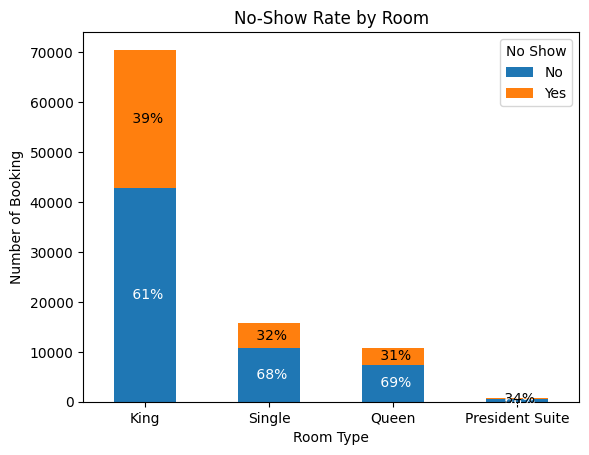

In [53]:
#First table for count
gf = countTable('room', 'no_show')
gf_order = gf.sum(axis=1).sort_values(ascending=False).index
gf = gf.reindex(gf_order)

#Second table for percent
gf_percent = percentTable('room', 'no_show').reindex(gf_order)

#Graph
ax = gf.plot(kind='bar', stacked=True)
ax.set(title='No-Show Rate by Room', ylabel='Number of Booking', xlabel='Room Type')
ax.legend(['No','Yes'],title='No Show')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

segment_colors = {'0.0': 'white', '1.0': 'black'}
for c in ax.containers: 
    label = c.get_label()
    labels = [f'{x: 0.0f}%' if v.get_height() > 0 else '' for v, x in zip(c, gf_percent[float(label)])]
    ax.bar_label(c, labels=labels, label_type='center', color=segment_colors[label])

gf_percent

<h2 style='color:red'>Summary3 - Visualization (categorical data)</h2>
<p>1. is there a pattern of response against categorical variables?</p>
    <ul>
        <li>Each month, there is around 9k to 10k customers make bookings. Most booking was made for arrival in August, July and May, while the least was made for arrival in January.</li>
        <li>Most booking was made for arrival in May, July, August, while the least was made for arrival in January.The no-show rate is about 30-40% each month, meaning there is 30-40% of guests who fail to turn up for their booking.</li>
        <li>Guests who booked for Changi branch has much higher no-show rate (42%) compared to those for Orchard branch (28%)</li>
        <li>Among countries, China citizen has the highest no-show rate (57%), followed by Malaysian (35%) and Indonesian (27%). On contrary, 83% of Japanese check in on arrival day, which is the highest among all countries.</li>
        <li>Most customers are first-timer (97%). The no-show rate is higher in First-timer (38%) compared to Returning Visitor (14%)</li>
        <li>Booking are made through four platforms: Website (45%), Email (27%), Agent (18%), Phone (9%).</li>
        <li>Most guests are single adult with 1 kid (23.1%) or single-adult traveller  without kid (22.6%). But there isn't much difference in the no-show rate based on traveller numbers.</li>
        <li>No-Show rate is the highest for 'King' Room (39%)</li>
    </ul>


In [54]:
#Group - find total number of invalid entry within each group
df.groupby('no_show')['stay_duration_days'].apply(lambda x: x.isnull().sum())

no_show
0.00    0
1.00    0
Name: stay_duration_days, dtype: int64

In [55]:
#Group - find total number of valid entry within each group. count() ignore 'None' and nan.
df.groupby('no_show')['stay_duration_days'].count()

no_show
0.00    75166
1.00    44224
Name: stay_duration_days, dtype: int64

In [56]:
#Column - find total number of invalid VS valid entry
df['stay_duration_days'].apply(lambda x : 'nan' if np.isnan(x) else 'number').value_counts()

stay_duration_days
number    119390
Name: count, dtype: int64

<h4>(Obsolete comment)'stay duration' has 5696 missing data (nullified), accounting 5% of data in 'show' and 'no show' response. In another word, this missing data is quite balanced in response.</h4>

In [57]:
# #df['duration'] = df['stay_duration_days'].apply(lambda x : 'nan' if np.isnan(x) else 'number')
# na_duration = pd.crosstab(df.no_show, df.duration)
# na_duration['%na_stay_duration_days'] = na_duration['nan']/na_duration['number']
# na_duration

In [58]:
# sns.countplot(data=df, x='no_show', hue='duration')

<h4>53% of bookings were priced in the range of SGD800 to SGD1000, the no-show rate is also the highest (42%) in this price range compared to others. (null value in 'price' is excluded)</h4>

<Axes: xlabel='price_in_sgd'>

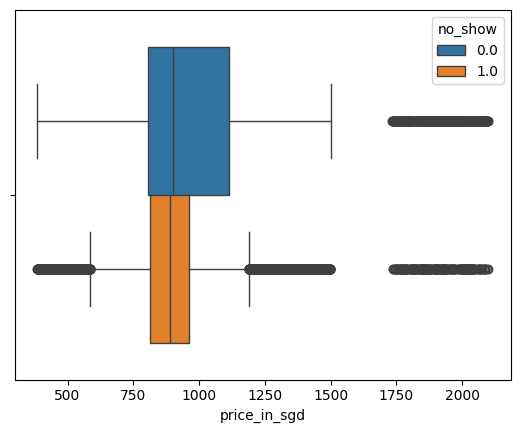

In [59]:
sns.boxplot(data=df[df['price_in_sgd']>0], x='price_in_sgd', hue='no_show')

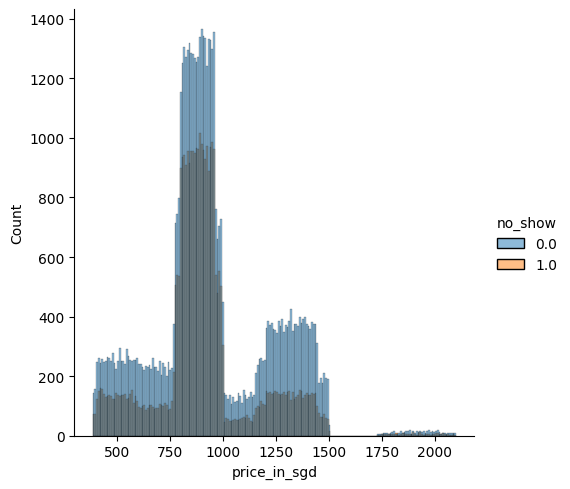

In [60]:
sns.displot(data=df[df['price_in_sgd']>0], x='price_in_sgd', hue='no_show')

<Axes: xlabel='price_in_sgd', ylabel='Count'>

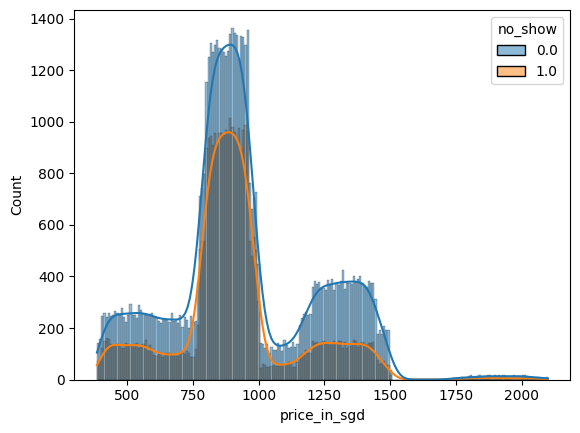

In [61]:
sns.histplot(data=df[df['price_in_sgd']>0], x='price_in_sgd', hue='no_show', element='bars', kde=True)

In [62]:
df['price_in_sgd_group'] = pd.cut(df['price_in_sgd'], bins=np.arange(0,2400,200))

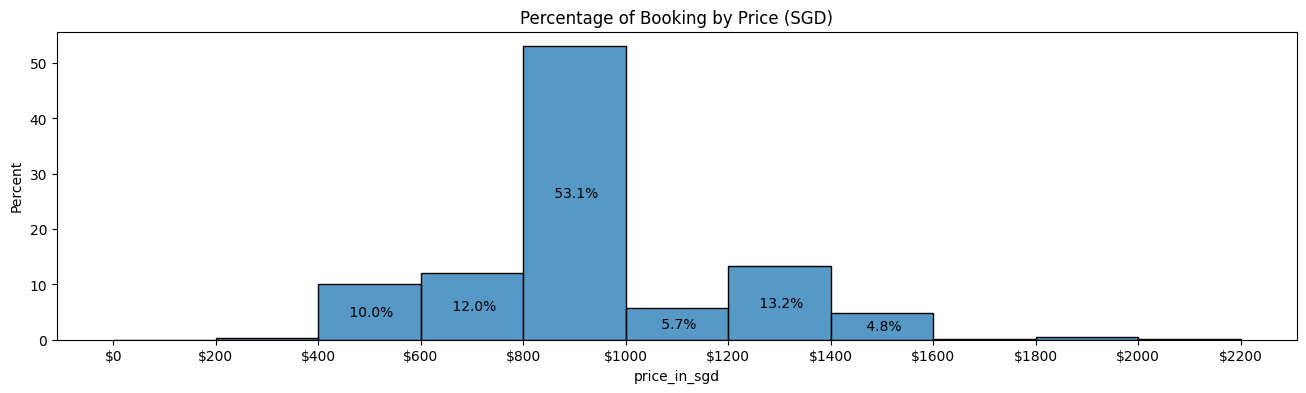

In [63]:
plt.figure(figsize=(16,4))
xticks = np.arange(0,2400,200)
ax = sns.histplot(x=df[df.price_in_sgd > 0]['price_in_sgd'], bins=xticks,stat='percent', multiple="stack")
plt.title('Percentage of Booking by Price (SGD)')
plt.xticks(ticks=xticks, labels=[f'${x}' for x in xticks])

ax.bar_label(ax.containers[0], fmt= lambda x: f'{x: 0.1f}%' if x > 4 else '', label_type='center')
plt.show()

In [64]:
df['price_in_sgd_group'].value_counts(normalize=True)

price_in_sgd_group
(800, 1000]    0.53
(1200, 1400]   0.13
(600, 800]     0.12
(400, 600]     0.10
(1000, 1200]   0.06
(1400, 1600]   0.05
(1800, 2000]   0.00
(200, 400]     0.00
(2000, 2200]   0.00
(1600, 1800]   0.00
(0, 200]       0.00
Name: proportion, dtype: float64

/var/folders/x1/1y5syh4x77n7xm6zlbw32hcr0000gn/T/ipykernel_1761/1340302497.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gf = df.groupby('price_in_sgd_group').no_show.value_counts().reset_index().pivot(


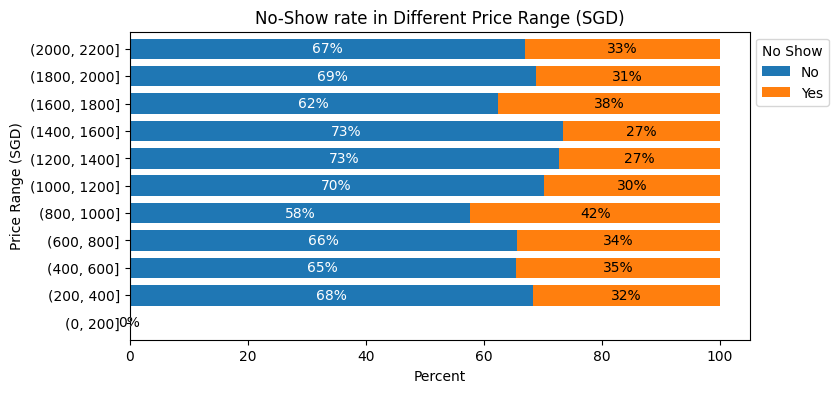

In [65]:
gf = df.groupby('price_in_sgd_group').no_show.value_counts().reset_index().pivot(
    columns='no_show',
    index='price_in_sgd_group',
    values='count').apply(lambda x: x/sum(x) * 100, axis = 1)

ax = gf.plot(kind='barh', stacked=True, figsize=(8,4), width=0.75)
ax.set_title('No-Show rate in Different Price Range (SGD)')
ax.set_ylabel('Price Range (SGD)')
ax.set_xlabel('Percent')
ax.legend(['No','Yes'], title='No Show', loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=0)

color = {'0.0': 'white', '1.0': 'black'}
for c in ax.containers:
    label = c.get_label()
    ax.bar_label(c, fmt=lambda x: f'{x:0.0f}%', label_type="center", color=color[label])

<h4>96.4% of bookings were made for 1-4 days of stay : 1-day stay (40%), 2-day stay (43%), 3-day stay (10%), 4-day stay (4%), and the no-show rate is 32%, 41%, 41% and 36% respectively  (null value in 'stay_duration_days' is excluded')</h4>

<Axes: xlabel='stay_duration_days'>

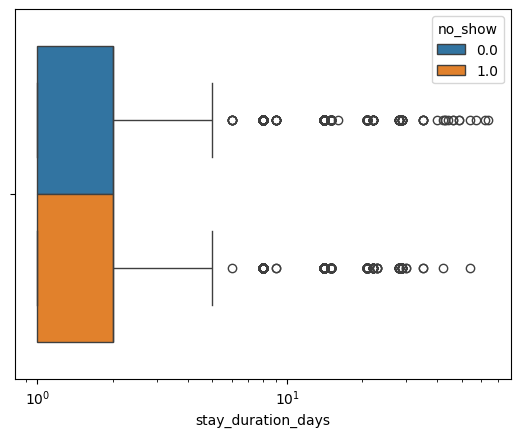

In [66]:
sns.boxplot(data=df[df['stay_duration_days']>0], x='stay_duration_days', hue='no_show', log_scale=True)

<Axes: xlabel='stay_duration_days', ylabel='Count'>

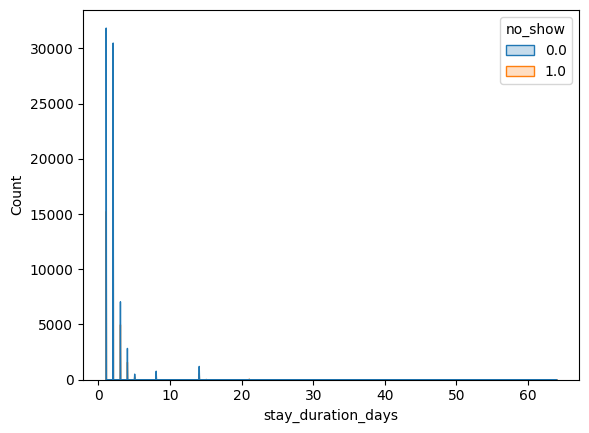

In [67]:
sns.histplot(data=df[df['stay_duration_days']>0], x='stay_duration_days', hue='no_show', element='poly')

In [68]:
df['stay_duration_days_group'] = pd.cut(df['stay_duration_days'],bins=[1,2,3,4,5,65], right=False)

In [69]:
df[df.stay_duration_days > 0].stay_duration_days.value_counts(normalize=True)

stay_duration_days
2    0.43
1    0.40
3    0.10
4    0.04
14   0.02
8    0.01
5    0.01
21   0.00
15   0.00
28   0.00
22   0.00
29   0.00
9    0.00
6    0.00
35   0.00
23   0.00
43   0.00
46   0.00
30   0.00
42   0.00
54   0.00
49   0.00
62   0.00
64   0.00
44   0.00
40   0.00
16   0.00
57   0.00
Name: proportion, dtype: float64

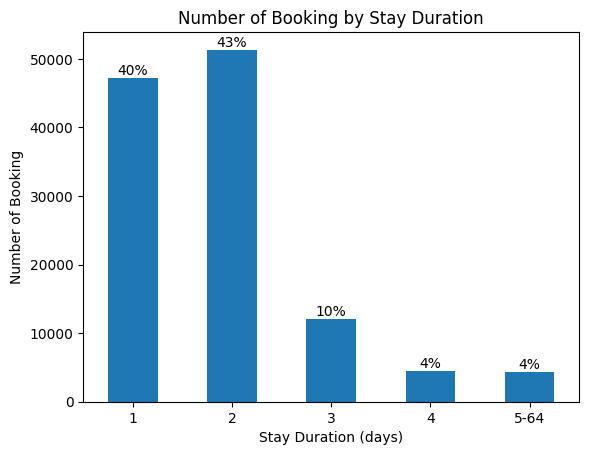

In [70]:
a = df['stay_duration_days_group'].unique()
stay_duration_days_group_order = a.categories

#Get the count table
gf = df.stay_duration_days_group.value_counts().reset_index()
gf['Percent'] = gf['count']/sum(gf['count'])*100
gf = gf.set_index('stay_duration_days_group').reindex(stay_duration_days_group_order)

#Plot the Chart
ax = gf.plot(kind='bar', y='count', legend=False)
ax.set_title('Number of Booking by Stay Duration')
ax.set_ylabel('Number of Booking')
ax.set_xlabel('Stay Duration (days)')
ax.set_xticklabels(['1','2','3','4','5-64'], rotation=0)

#Annotate the bar label
labels = [f'{gf.iloc[i,1]:0.0f}%' for i, v in enumerate(ax.containers[0])]
ax.bar_label(ax.containers[0], labels=labels )

plt.show()

In [71]:
df.groupby('stay_duration_days_group').no_show.value_counts(normalize=True)

/var/folders/x1/1y5syh4x77n7xm6zlbw32hcr0000gn/T/ipykernel_1761/527742231.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('stay_duration_days_group').no_show.value_counts(normalize=True)


stay_duration_days_group  no_show
[1, 2)                    0.00      0.68
                          1.00      0.32
[2, 3)                    0.00      0.59
                          1.00      0.41
[3, 4)                    0.00      0.59
                          1.00      0.41
[4, 5)                    0.00      0.64
                          1.00      0.36
[5, 65)                   0.00      0.64
                          1.00      0.36
Name: proportion, dtype: float64

/var/folders/x1/1y5syh4x77n7xm6zlbw32hcr0000gn/T/ipykernel_1761/3644643717.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gf = df.groupby('stay_duration_days_group').no_show.value_counts().reset_index().pivot(


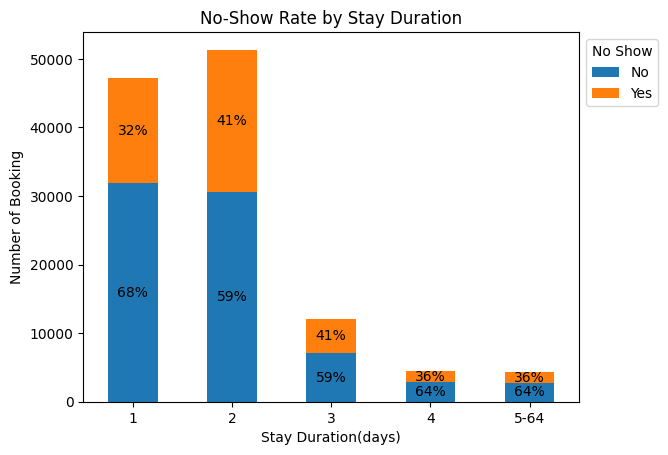

In [72]:
#first table for count number
gf = df.groupby('stay_duration_days_group').no_show.value_counts().reset_index().pivot(
    columns='no_show',
    index='stay_duration_days_group',
    values='count')

#second table for percentage
gf_percent = gf.apply(lambda x: x/sum(x)*100, axis=1)

ax = gf.plot(kind='bar', stacked=True)
ax.legend(['No', 'Yes'], title="No Show", loc='upper left', bbox_to_anchor=(1,1))
ax.set_title('No-Show Rate by Stay Duration')
ax.set_ylabel('Number of Booking')
ax.set_xlabel('Stay Duration(days)')
ax.set_xticklabels(['1','2','3','4','5-64'], rotation=0)

for c in ax.containers:
    label = c.get_label()
    labels = [f'{x:0.0f}%'for v, x in zip(c, gf_percent[float(label)])]
    ax.bar_label(c, labels=labels, label_type="center")

<h4>31% of the booking were SGD400-600 per night, 21% were SGD800-1000 per night and 20% were SGD200-400 per night. The no-show rate is 42%, 38%, 39% respectively, which are also the top three among all.(Null value for 'price' and 'checkout_day' are excluded')</h4>

In [73]:
df['price_per_night'] = (df['price_in_sgd']/df['stay_duration_days'])

<Axes: xlabel='price_per_night'>

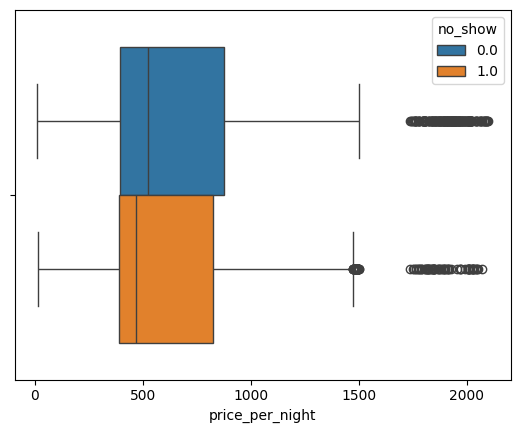

In [74]:
sns.boxplot(data=df[df['price_per_night']>0], x='price_per_night', hue='no_show')

<Axes: xlabel='price_per_night', ylabel='Count'>

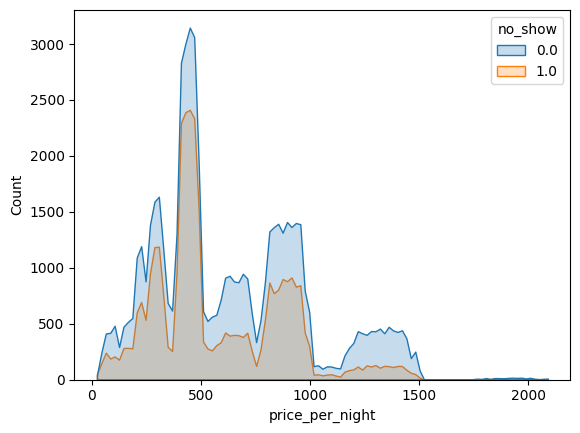

In [75]:
sns.histplot(data=df[df['price_per_night']>0], x='price_per_night', hue='no_show', element='poly')

In [76]:
df['price_per_night_group'] = pd.cut(df['price_per_night'], bins=np.arange(0,2300,200))
b = df['price_per_night_group'].unique()
price_per_night_group_order = b.categories

In [77]:
df[df['price_per_night']>0]['price_per_night_group'].value_counts(normalize=True)

price_per_night_group
(400, 600]     0.31
(800, 1000]    0.21
(200, 400]     0.20
(600, 800]     0.12
(0, 200]       0.06
(1200, 1400]   0.06
(1000, 1200]   0.02
(1400, 1600]   0.02
(1800, 2000]   0.00
(2000, 2200]   0.00
(1600, 1800]   0.00
Name: proportion, dtype: float64

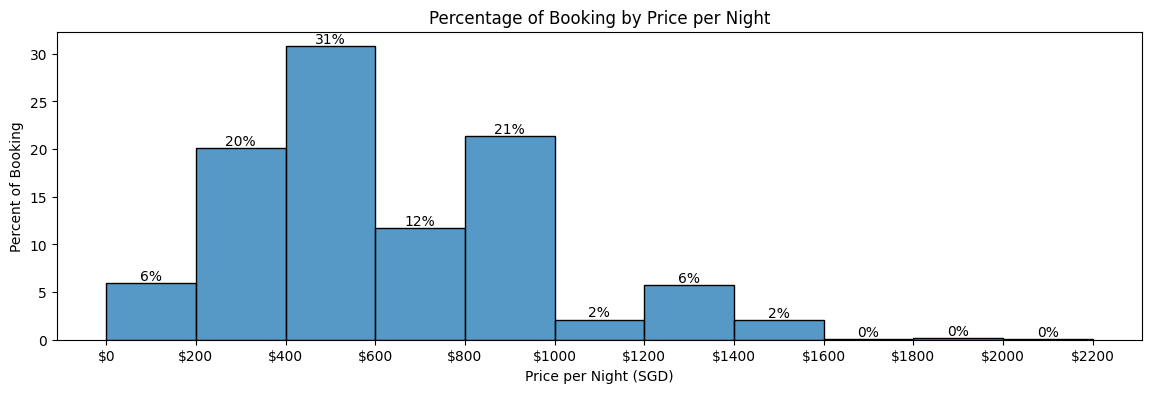

In [78]:
xticks = np.arange(0,2300,200)
plt.figure(figsize=(14,4))
ax = sns.histplot(x = df[df['price_per_night']>0]['price_per_night'], stat='percent', bins=xticks)
ax.set_xticks(ticks=xticks, labels= [f'${x}' for x in xticks])
ax.set_title('Percentage of Booking by Price per Night')
ax.set_ylabel('Percent of Booking')
ax.set_xlabel('Price per Night (SGD)')

ax.bar_label(ax.containers[0], fmt=lambda x: f'{x:0.0f}%')

plt.show()

In [79]:
df.groupby('price_per_night_group').no_show.value_counts(normalize=True)

/var/folders/x1/1y5syh4x77n7xm6zlbw32hcr0000gn/T/ipykernel_1761/2914946852.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('price_per_night_group').no_show.value_counts(normalize=True)


price_per_night_group  no_show
(0, 200]               0.00      0.65
                       1.00      0.35
(200, 400]             0.00      0.61
                       1.00      0.39
(400, 600]             0.00      0.58
                       1.00      0.42
(600, 800]             0.00      0.69
                       1.00      0.31
(800, 1000]            0.00      0.62
                       1.00      0.38
(1000, 1200]           0.00      0.75
                       1.00      0.25
(1200, 1400]           0.00      0.79
                       1.00      0.21
(1400, 1600]           0.00      0.80
                       1.00      0.20
(1600, 1800]           0.00      0.66
                       1.00      0.34
(1800, 2000]           0.00      0.77
                       1.00      0.23
(2000, 2200]           0.00      0.70
                       1.00      0.30
Name: proportion, dtype: float64

/var/folders/x1/1y5syh4x77n7xm6zlbw32hcr0000gn/T/ipykernel_1761/3501632125.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gf = df.groupby('price_per_night_group').no_show.value_counts().reset_index().pivot(


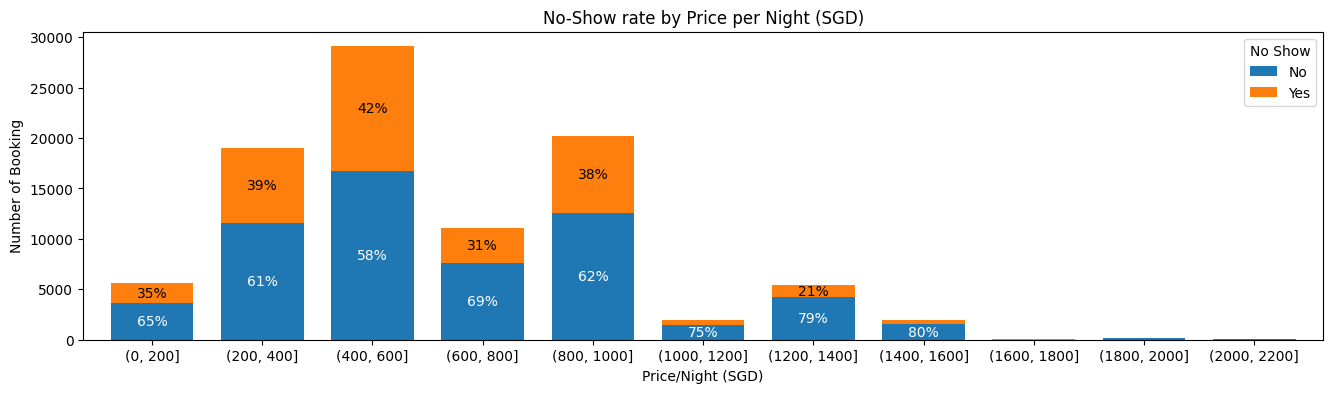

In [80]:
#First table - count table
gf = df.groupby('price_per_night_group').no_show.value_counts().reset_index().pivot(
    columns='no_show',
    index='price_per_night_group',
    values='count')

#Second table - percent table
gf_percent = gf.apply(lambda x: x/sum(x)*100, axis=1)

ax = gf.plot(kind='bar', stacked=True,figsize=(16,4), width=0.75)
ax.set_title('No-Show rate by Price per Night (SGD)')
ax.set_ylabel('Number of Booking')
ax.set_xlabel('Price/Night (SGD)')
ax.legend(['No','Yes'], title='No Show')
plt.xticks(rotation=0)

color = {'0.0': 'white', '1.0': 'black'}
for c in ax.containers:
    label = c.get_label()
    labels =  [f'{x:0.0f}%' if v.get_height() > 500 else '' for v, x in zip(c, gf_percent[float(label)])]
    ax.bar_label(c, labels=labels, label_type="center", color=color[label])

<h4>No-Show Rate is the lowest (25%) when booking was made within the same month of arrival, and it gets higher when the booking was made months before arrival.</h4>

In [81]:
df.groupby('advance_booking_month').no_show.value_counts(normalize=True)

advance_booking_month  no_show
0                      0.00      0.75
                       1.00      0.25
1                      0.00      0.66
                       1.00      0.34
2                      0.00      0.63
                       1.00      0.37
3                      0.00      0.62
                       1.00      0.38
4                      0.00      0.65
                       1.00      0.35
5                      0.00      0.61
                       1.00      0.39
6                      0.00      0.60
                       1.00      0.40
7                      0.00      0.60
                       1.00      0.40
8                      0.00      0.58
                       1.00      0.42
9                      0.00      0.59
                       1.00      0.41
10                     0.00      0.57
                       1.00      0.43
11                     0.00      0.60
                       1.00      0.40
Name: proportion, dtype: float64

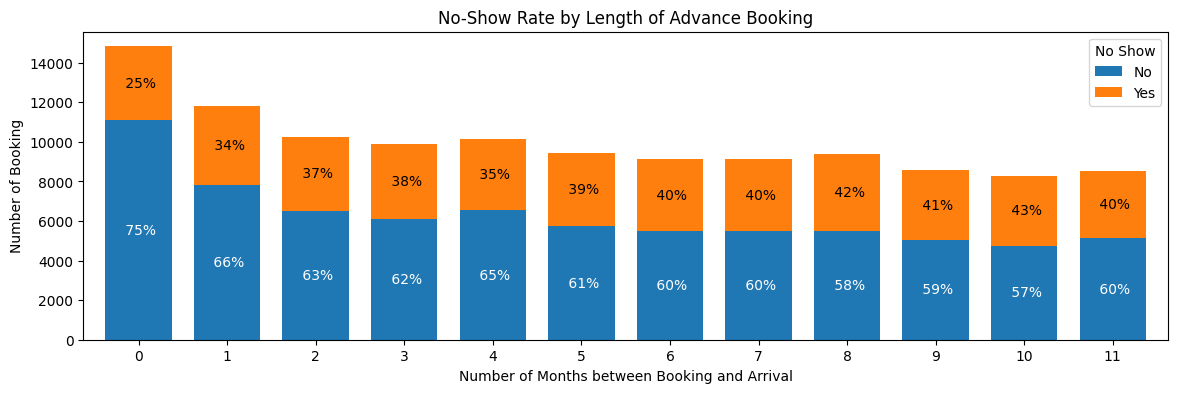

In [82]:
#first table for count number
gf = df.groupby('advance_booking_month').no_show.value_counts().reset_index().pivot(
    columns='no_show',
    index='advance_booking_month',
    values='count')

gf_percent = gf.apply(lambda x: x/sum(x)*100, axis=1)

gf_percent

ax = gf.plot(kind='bar', stacked=True, width=0.75, figsize=(14,4))
ax.set_title('No-Show Rate by Length of Advance Booking')
ax.set_ylabel('Number of Booking')
ax.set_xlabel('Number of Months between Booking and Arrival')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.legend(['No', 'Yes'], title='No Show')

segment_colors = {'0.0': 'white', '1.0': 'black'}
for c in ax.containers: 
    label = c.get_label()
    labels = [f'{x: 0.0f}%' if v.get_height() > 0 else '' for v, x in zip(c, gf_percent[float(label)])] 
    ax.bar_label(c, labels=labels, label_type='center', color=segment_colors[label])


<h4>On each arrival day, the average booking is 326, 11December has the least booking or 89 and the most booking or 637 were made for 16October. Top 5 No-show rate are on 8June, 17Feb, 8Dec, 16Oct, 7Nov.</h4>

In [83]:
df['arrival_month_day'] = pd.to_datetime(df['arrival_month_day'], format='%Y%B%d')

In [84]:
df['arrival_month_day'].value_counts().sort_index()

arrival_month_day
2024-01-01    172
2024-01-02    362
2024-01-03    186
2024-01-04    173
2024-01-05    145
             ... 
2024-12-27    338
2024-12-28    249
2024-12-29    318
2024-12-30    476
2024-12-31    199
Name: count, Length: 366, dtype: int64

In [85]:
percentTable('arrival_month_day', 'no_show').sort_values(1, ascending=False).head(10)

no_show,0.00,1.00
arrival_month_day,,
2024-06-08,37.80,62.20
2024-02-17,40.52,59.48
2024-12-08,41.30,58.70
2024-10-16,44.11,55.89
2024-11-07,44.23,55.77
2024-02-28,44.59,55.41
2024-05-19,44.66,55.34
2024-06-17,44.82,55.18
2024-06-14,46.13,53.87


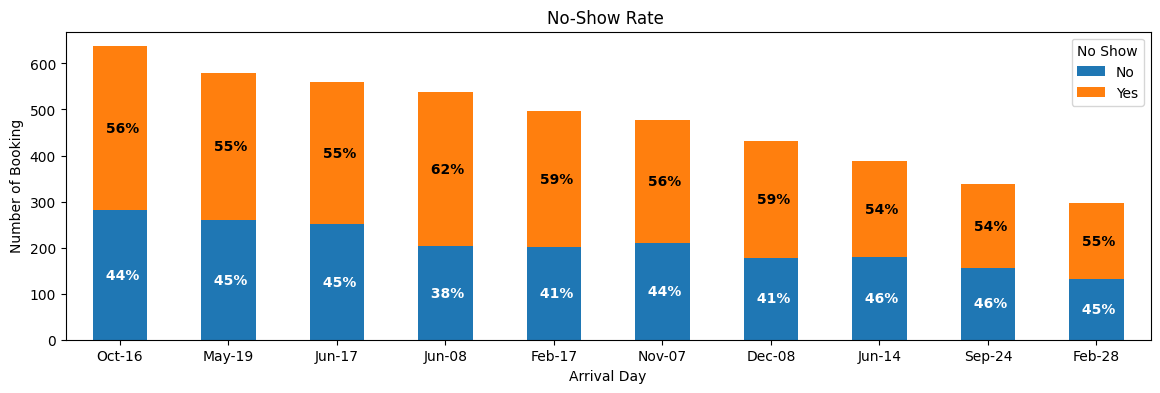

In [86]:
gf_percent = percentTable('arrival_month_day', 'no_show').sort_values(1, ascending=False)
#sort by no-show rate
rate_order = gf_percent.index
#filter the top10 date with high no-show rate for both table
gf = countTable('arrival_month_day', 'no_show').reindex(rate_order).head(10)
gf_percent = gf_percent.head(10)
#sort by booking number
number_order = gf.sum(axis=1).sort_values(ascending=False).index
#reorder both tables
gf = gf.reindex(number_order)
gf_percent = gf_percent.reindex(number_order)
gf.index = pd.to_datetime(gf.index)

#Draw Graph
ax = gf.plot(kind='bar', stacked=True, figsize=(14,4))
ax.set(title='No-Show Rate ', ylabel='Number of Booking', xlabel='Arrival Day')
ax.legend(['No','Yes'], title='No Show')

#Extract the index.month and index.day into a new table IN ORDER TO reformat the dates in x-axis
xlabel = pd.DataFrame({
    'month' : gf.index.month,
    'day' : gf.index.day
})
#generate dataseries with 'mm-dd' as string
xlabel['formatted_date'] = xlabel['month'].astype(str) + '-' + xlabel['day'].astype(str)
#change the data type as datetime 
xlabel['formatted_date'] = pd.to_datetime(xlabel['formatted_date'],format='%m-%d')
#reformat the datetime
xlabel['formatted_date'] = xlabel['formatted_date'].dt.strftime("%b-%d")
#Pass into the graph as string
ax.set_xticklabels(xlabel['formatted_date'].astype(str), rotation=0)
# print(ax.get_xticklabels())


for c in ax.containers: 
    label = c.get_label()
    labels = [f'{x: 0.0f}%' if v.get_height() > 0 else '' for v, x in zip(c, gf_percent[float(label)])]
    ax.bar_label(c, labels=labels, label_type='center', fontweight='bold', color=segment_colors[label])

Text(0.5, 1.0, 'Number of Booking By Day')

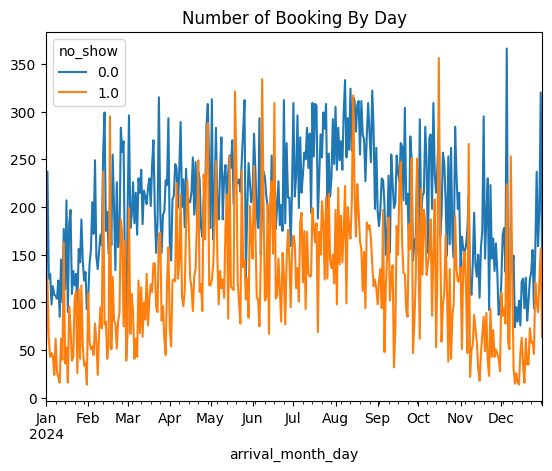

In [87]:
df.groupby('no_show')['arrival_month_day'].value_counts().reset_index().pivot(
    columns='no_show',
    index='arrival_month_day',
    values='count').resample('D').sum().plot() #.resample('D').sum() is important before making 'date' graph
plt.title('Number of Booking By Day')

Text(0.5, 1.0, 'Number of Booking By Week')

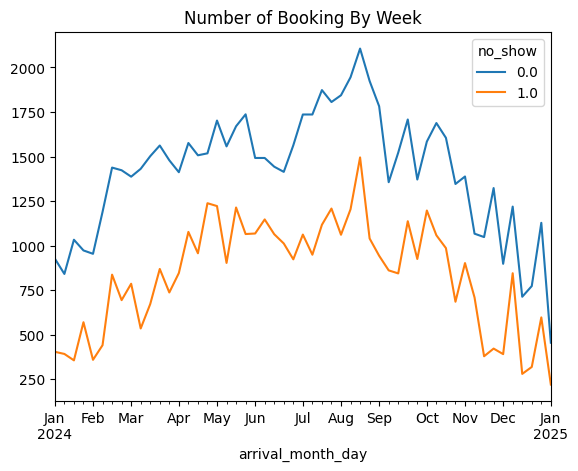

In [88]:
df.groupby('no_show')['arrival_month_day'].value_counts().reset_index().pivot(
    columns='no_show',
    index='arrival_month_day',
    values='count').resample('W').sum().plot()
plt.title('Number of Booking By Week')

<h2 style='color:red'>Summary4 - Visualization (Numeric data)</h2>
<p>1.  'stay duration' has 5696 missing data, accounting 5% of data in 'show' and 'no show' response. In another world, this missing data is quite balanced in response.</p>
<p>2. is there a pattern of response against numeric data?</p>
    <ul>
        <li>53% of bookings were priced in the range of SGD800 to SGD1000, the no-show rate is also the highest (42%) in this price range compared to others. (null value in 'price' is excluded).</li>
        <li>96.4% of bookings were made for 1-4 days of stay : 1-day stay (40%), 2-day stay (43%), 3-day stay (10%), 4-day stay (4%), and the no-show rate is 32%, 41%, 41% and 36% respectively  (null value in 'stay_duration_days' is excluded')</li>
        <li>31% of the booking were SGD400-600 per night, 21% were SGD800-1000 per night and 20% were SGD200-400 per night. The no-show rate is 42%, 38%, 39% respectively, which are also the top three among all.(Null value for 'price' and 'checkout_day' are excluded')</li>
        <li>No-Show Rate is the lowest (25%) when booking was made within the same month of arrival, and it gets higher when the booking was made months before arrival.</li>
    </ul>

<h1>Machine Learning</h1>

<h2>Preprocessing</h2>
<p>Any feature show strong predictability?</p>
<li>'booking_month': no</li>
<li>'Arrival_month' : no</li>
<li>'Arrival_day': Top 5 No-show rate are on 8June, 17Feb, 8Dec, 16Oct, 7Nov</li>
<li>'Branch': Changi branch has much higher no-show rate</li>
<li>'Country': China citizen has the highest no-show rate (57%), followed by Malaysian (35%) and Indonesian (27%)</li>
<li>'First-time': The no-show rate is higher in First-timer</li>
<li>'Room': No-Show rate is the highest for 'King' Room (39%)</li>
<li>'Platform': no</li>
<li>'num_traveller': no</li>
<li>'price_in_sg': the no-show rate is also the highest in the range of SGD800 to SGD1000 </li>
<li>'stay_duration_days': the no-show rate is 32%, 41%, 41% and 36% for 1-4 days of stay </li>
<li>'price_per_night': Top 3 high no-show rate is SGD400-600 per night, SGD800-1000 per night and SGD200-400 per night</li>
<li>'advance_booking_month': No-Show Rate is the lowest (25%) when booking was made within the same month of arrival</li>

In [89]:
df.columns

Index(['booking_id', 'no_show', 'branch', 'booking_month', 'arrival_month',
       'arrival_day', 'checkout_month', 'checkout_day', 'country',
       'first_time', 'room', 'price', 'platform', 'num_adults', 'num_children',
       'currency', 'price_in_sgd', 'arrival_month_day', 'checkout_month_day',
       'stay_duration_days', 'advance_booking_month', 'traveller_number',
       'price_in_sgd_group', 'stay_duration_days_group', 'price_per_night',
       'price_per_night_group'],
      dtype='object')

In [90]:
for c in df.columns.tolist():
    print(c, df[c].unique().shape[0])

booking_id 119390
no_show 2
branch 2
booking_month 12
arrival_month 12
arrival_day 31
checkout_month 12
checkout_day 31
country 7
first_time 2
room 5
price 61868
platform 4
num_adults 2
num_children 4
currency 3
price_in_sgd 61575
arrival_month_day 366
checkout_month_day 365
stay_duration_days 28
advance_booking_month 12
traveller_number 5
price_in_sgd_group 11
stay_duration_days_group 5
price_per_night 77567
price_per_night_group 12


In [91]:
df['arrival_month_day'] = df['arrival_month'].astype('string') +  df['arrival_day']
df['checkout_month_day'] = df['checkout_month'].astype('string') + df['checkout_day']

In [92]:
df['arrival_day'] = df['arrival_day'].astype(int)
df['checkout_day'] = df['checkout_day'].astype(int)

<h4>Select Feature</h4>

In [93]:
irrelevant_variable = ['booking_id']
raw_variable = ['price']
unbinned_variable = ['stay_duration_days_group', 'price_per_night_group', 'price_in_sgd_group']
extra_variable = ['arrival_month_day', 'checkout_month_day', 'traveller_number', 'currency']
drop_variable = irrelevant_variable + unbinned_variable + extra_variable + raw_variable

df.columns.drop(drop_variable)

Index(['no_show', 'branch', 'booking_month', 'arrival_month', 'arrival_day',
       'checkout_month', 'checkout_day', 'country', 'first_time', 'room',
       'platform', 'num_adults', 'num_children', 'price_in_sgd',
       'stay_duration_days', 'advance_booking_month', 'price_per_night'],
      dtype='object')

<h4>Table for Machine Learning</h4>

In [94]:
df = df[df.columns.drop(drop_variable)]
df.head(2)

,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,platform,num_adults,num_children,price_in_sgd,stay_duration_days,advance_booking_month,price_per_night
0,0.00,Changi,November,June,25,June,27,Singapore,Yes,Single,Website,1,0,492.98,2,7,246.49
1,0.00,Orchard,August,November,28,November,29,Indonesia,Yes,King,Website,2,0,1351.22,1,3,1351.22


<h4>Handle Missing Data - Room, Price</h4>

In [95]:
df.isnull().any()

no_show                  False
branch                   False
booking_month            False
arrival_month            False
arrival_day              False
checkout_month           False
checkout_day             False
country                  False
first_time               False
room                      True
platform                 False
num_adults               False
num_children             False
price_in_sgd             False
stay_duration_days       False
advance_booking_month    False
price_per_night          False
dtype: bool

In [96]:
df['room'].isnull().sum()

np.int64(21612)

In [97]:
#Mode Imputation for np.nan in 'Room'
mode = df['room'].mode()[0]
df['room'] = df['room'].fillna(mode)
df['room'].isnull().sum()

np.int64(0)

In [98]:
df[df['price_in_sgd']==0].shape

(24881, 17)

In [99]:
#Mean Imputation for np.nan in 'Price'
m = df['price_in_sgd'].median()
df['price_in_sgd'] = df['price_in_sgd'].replace(0, m)

In [100]:
df['price_in_sgd'].median()

np.float64(850.15)

In [101]:
df['price_in_sgd'].mean()

np.float64(914.8362076823853)

In [102]:
df.columns[df.isin([0]).any()]

Index(['no_show', 'num_children', 'advance_booking_month', 'price_per_night'], dtype='object')

In [103]:
#recalculate the 'price_per_night'
df['price_per_night'] = (df['price_in_sgd']/df['stay_duration_days'])
df.columns[df.isin([0]).any()]

Index(['no_show', 'num_children', 'advance_booking_month'], dtype='object')

<h4>Encode Categorical Data</h4>

In [104]:
#df = df.drop('duration',axis=1)

In [105]:
def tt():
    tt = pd.DataFrame({
        'column': [c for c in df.columns]
    })
    tt['isnull'] = tt['column'].apply(lambda x: df[x].isnull().any())
    tt['zero'] = tt['column'].apply(lambda x: df[x].isin([0]).any())
    tt['unique_value_5'] = tt['column'].apply(lambda x : df[x].unique()[:5])
    tt['dtypes'] = tt['column'].apply(lambda x : df[x].dtypes)
    tt['Nominal_Ordinal_Numeric'] = ['Nominal', 'Nominal', 'Ordinal', 'Ordinal', 'Ordinal', 'Ordinal', 'Ordinal', 'Nominal', 'Nominal', 'Nominal', 'Nominal', 'Numeric', 'Numeric', 'Numeric', 'Numeric', 'Numeric', 'Numeric']
    return tt
tt_one = tt()
tt_one

,column,isnull,zero,unique_value_5,dtypes,Nominal_Ordinal_Numeric
0,no_show,False,True,"[0.0, 1.0]",float64,Nominal
1,branch,False,False,"[Changi, Orchard]",object,Nominal
2,booking_month,False,False,"['November', 'August', 'March', 'September', '...",category,Ordinal
3,arrival_month,False,False,"['June', 'November', 'February', 'October', 'S...",category,Ordinal
4,arrival_day,False,False,"[25, 28, 7, 1, 20]",int64,Ordinal
5,checkout_month,False,False,"['June', 'November', 'February', 'October', 'S...",category,Ordinal
6,checkout_day,False,False,"[27, 29, 11, 3, 24]",int64,Ordinal
7,country,False,False,"[Singapore, Indonesia, India, China, Australia]",object,Nominal
8,first_time,False,False,"[Yes, No]",object,Nominal
9,room,False,False,"[Single, King, Queen, President Suite]",object,Nominal


In [106]:
#encode the categorical variables with 2 unique values
for col in ['branch','first_time']:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    #df[col] = encoder.inverse_transform(df[col])
    print(col,':',dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

branch : {'Changi': np.int64(0), 'Orchard': np.int64(1)}
first_time : {'No': np.int64(0), 'Yes': np.int64(1)}


In [107]:
#encode month data
Month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['booking_month'] = pd.Categorical(df['booking_month'],Month_order,ordered=True)
df['arrival_month'] = pd.Categorical(df['arrival_month'],Month_order,ordered=True)
df['checkout_month'] = pd.Categorical(df['checkout_month'],Month_order,ordered=True)
df['booking_month'] = df['booking_month'].cat.codes
df['arrival_month'] = df['arrival_month'].cat.codes
df['checkout_month'] = df['checkout_month'].cat.codes

In [108]:
tt_one['unique_value_5_after'] = tt_one['column'].apply(lambda x : df[x].unique()[:5])
tt_one

,column,isnull,zero,unique_value_5,dtypes,Nominal_Ordinal_Numeric,unique_value_5_after
0,no_show,False,True,"[0.0, 1.0]",float64,Nominal,"[0.0, 1.0]"
1,branch,False,False,"[Changi, Orchard]",object,Nominal,"[0, 1]"
2,booking_month,False,False,"['November', 'August', 'March', 'September', '...",category,Ordinal,"[10, 7, 2, 8, 6]"
3,arrival_month,False,False,"['June', 'November', 'February', 'October', 'S...",category,Ordinal,"[5, 10, 1, 9, 8]"
4,arrival_day,False,False,"[25, 28, 7, 1, 20]",int64,Ordinal,"[25, 28, 7, 1, 20]"
5,checkout_month,False,False,"['June', 'November', 'February', 'October', 'S...",category,Ordinal,"[5, 10, 1, 9, 8]"
6,checkout_day,False,False,"[27, 29, 11, 3, 24]",int64,Ordinal,"[27, 29, 11, 3, 24]"
7,country,False,False,"[Singapore, Indonesia, India, China, Australia]",object,Nominal,"[Singapore, Indonesia, India, China, Australia]"
8,first_time,False,False,"[Yes, No]",object,Nominal,"[1, 0]"
9,room,False,False,"[Single, King, Queen, President Suite]",object,Nominal,"[Single, King, Queen, President Suite]"


In [109]:
#OHE
df = pd.get_dummies(data=df, columns=['country'],drop_first=True)
df = pd.get_dummies(data=df, columns=['room'],drop_first=True)
df = pd.get_dummies(data=df, columns=['platform'],drop_first=True)

In [110]:
tt_two = pd.DataFrame({
        'column': [c for c in df.columns]
    })
tt_two['isnull'] = tt_two['column'].apply(lambda x: df[x].isnull().any())
tt_two['zero'] = tt_two['column'].apply(lambda x: df[x].isin([0]).any())
tt_two['unique_value_5'] = tt_two['column'].apply(lambda x : df[x].unique()[:5])
tt_two['dtypes'] = tt_two['column'].apply(lambda x : df[x].dtypes)
tt_two

,column,isnull,zero,unique_value_5,dtypes
0,no_show,False,True,"[0.0, 1.0]",float64
1,branch,False,True,"[0, 1]",int64
2,booking_month,False,True,"[10, 7, 2, 8, 6]",int8
3,arrival_month,False,True,"[5, 10, 1, 9, 8]",int8
4,arrival_day,False,False,"[25, 28, 7, 1, 20]",int64
5,checkout_month,False,True,"[5, 10, 1, 9, 8]",int8
6,checkout_day,False,False,"[27, 29, 11, 3, 24]",int64
7,first_time,False,True,"[1, 0]",int64
8,num_adults,False,False,"[1, 2]",int64
9,num_children,False,True,"[0, 2, 1, 3]",int64


<h4>Scale Numerical Data</h4>

In [111]:
mm_scaler = MinMaxScaler(feature_range=(0, 1))
data = np.array(df['price_in_sgd']).reshape(-1,1) #[nx1] matrix
mm_scaler.fit(data)
print(mm_scaler.data_max_)
print(mm_scaler.transform(data))
data

[2099.96]
[[0.06271588]
 [0.56329132]
 [0.27103818]
 ...
 [0.2690495 ]
 [0.29215212]
 [0.30125095]]


array([[ 492.98  ],
       [1351.22  ],
       [ 850.15  ],
       ...,
       [ 846.7404],
       [ 886.35  ],
       [ 901.95  ]])

In [112]:
df['price_in_sgd'] = mm_scaler.fit_transform(data)
df['price_in_sgd']

0        0.06
1        0.56
2        0.27
3        0.16
4        0.29
         ... 
119386   0.25
119387   0.58
119388   0.27
119389   0.29
119390   0.30
Name: price_in_sgd, Length: 119390, dtype: float64

In [113]:
data = np.array(df['price_per_night']).reshape(-1,1) #[nx1] matrix
df['price_per_night'] = mm_scaler.fit_transform(data)
df['price_per_night']

0        0.11
1        0.64
2        0.10
3        0.15
4        0.10
         ... 
119386   0.19
119387   0.16
119388   0.40
119389   0.21
119390   0.05
Name: price_per_night, Length: 119390, dtype: float64

In [114]:
tt_three = pd.DataFrame({
        'column': [c for c in df.columns]
    })
tt_three['isnull'] = tt_three['column'].apply(lambda x: df[x].isnull().any())
tt_three['zero'] = tt_three['column'].apply(lambda x: df[x].isin([0]).any())
tt_three['unique_value_5'] = tt_three['column'].apply(lambda x : df[x].unique()[:5])
tt_three['dtypes'] = tt_three['column'].apply(lambda x : df[x].dtypes)
tt_three

,column,isnull,zero,unique_value_5,dtypes
0,no_show,False,True,"[0.0, 1.0]",float64
1,branch,False,True,"[0, 1]",int64
2,booking_month,False,True,"[10, 7, 2, 8, 6]",int8
3,arrival_month,False,True,"[5, 10, 1, 9, 8]",int8
4,arrival_day,False,False,"[25, 28, 7, 1, 20]",int64
5,checkout_month,False,True,"[5, 10, 1, 9, 8]",int8
6,checkout_day,False,False,"[27, 29, 11, 3, 24]",int64
7,first_time,False,True,"[1, 0]",int64
8,num_adults,False,False,"[1, 2]",int64
9,num_children,False,True,"[0, 2, 1, 3]",int64


<h2>Split Data</h2>

In [174]:
y = df['no_show']
X = df.drop('no_show', axis=1)
X.columns

Index(['branch', 'booking_month', 'arrival_month', 'arrival_day',
       'checkout_month', 'checkout_day', 'first_time', 'num_adults',
       'num_children', 'price_in_sgd', 'stay_duration_days',
       'advance_booking_month', 'price_per_night', 'country_China',
       'country_India', 'country_Indonesia', 'country_Japan',
       'country_Malaysia', 'country_Singapore', 'room_President Suite',
       'room_Queen', 'room_Single', 'platform_Email', 'platform_Phone',
       'platform_Website'],
      dtype='object')

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle=False, random_state=SEED)

In [117]:
print('No. of training records: {}, No. of training features: {}'.format(X_train.shape[0],X_train.shape[1]))
print('No. of test records: {}, No. of test features: {}'.format(X_test.shape[0], format(X_test.shape[1])))

No. of training records: 95512, No. of training features: 25
No. of test records: 23878, No. of test features: 25


In [118]:
print(np.mean(y_train))
print(np.mean(y_test))

0.3695242482619985
0.3739844208057626


In [139]:
print(y_train.count())
print(y_test.count())

95512
23878


<h4>Before undersampling</h4>

In [120]:
def draw_matrix(y_pred):
    cf = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf, annot=True, annot_kws={"size": 10},fmt='d', cmap=plt.cm.Blues)
    plt.ylabel('Actual Response')
    plt.xlabel('Predicted Response')

/Users/Wiki/Programming/NTUC_Learning_SGUS_2022/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Recall score for predicting class 1(No_Show):0.52


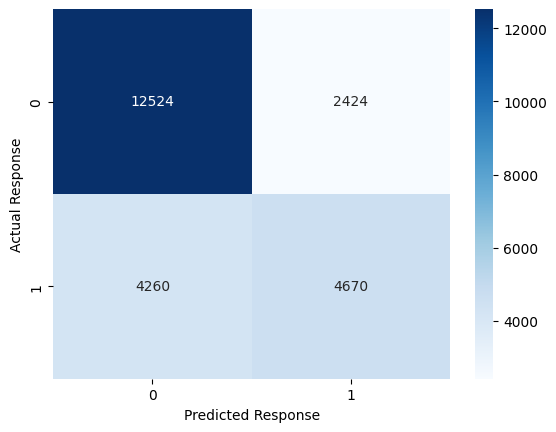

In [121]:
#Logistic Regression
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train, y_train) 
y_pred = Logistic_model.predict(X_test)
print('Logistic Regression')
print('Recall score for predicting class 1(No_Show):{:.2f}'.format(recall_score(y_test, y_pred)))
draw_matrix(y_pred)

Decision Tree
Recall score for predicting class 1(No_Show):0.62


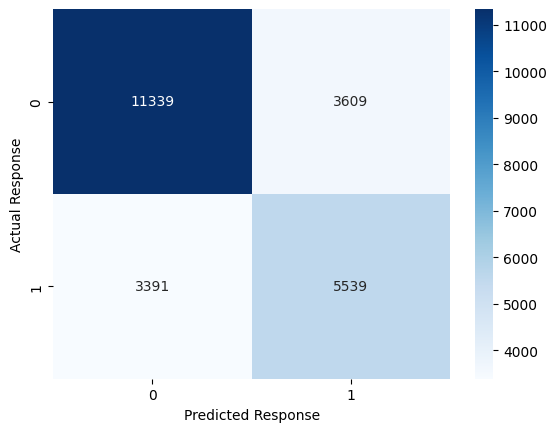

In [122]:
#Decision Tree 
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train) 
y_pred = DT_model.predict(X_test)
print('Decision Tree')
print('Recall score for predicting class 1(No_Show):{:.2f}'.format(recall_score(y_test, y_pred)))
draw_matrix(y_pred)

Random Forest
Recall score for predicting class 1(customers who are interested):0.56


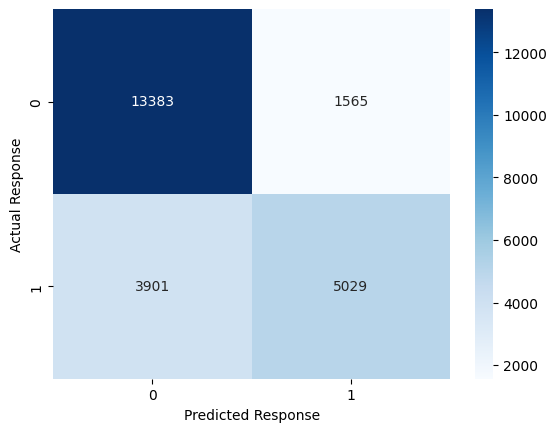

In [123]:
#Random Forest
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train) 
y_pred = RF_model.predict(X_test)
print('Random Forest')
print('Recall score for predicting class 1(customers who are interested):{:.2f}'.format(recall_score(y_test, y_pred)))
draw_matrix(y_pred)

<h4>Undersampling for train dataset</h4>

Percentage of target class 1(before Undersampling): 36.95%
Total training records before Undersampling: 95512
Percentage of target class 1(after Undersampling): 50.00%
Total training records after Undersampling: 70588


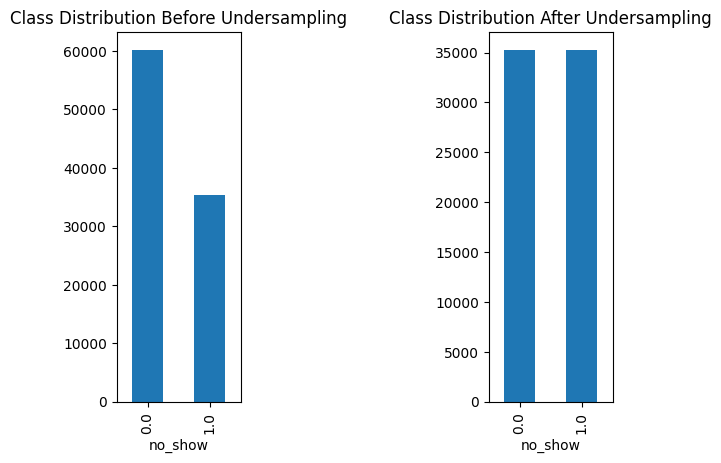

In [144]:
fig, ax = plt.subplots(1,2)
plt.subplots_adjust(wspace=2)

y_train.value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Class Distribution Before Undersampling')
print('Percentage of target class 1(before Undersampling): {:.2%}'.format(np.mean(y_train)))
print('Total training records before Undersampling: {}'.format(X_train.shape[0]))

under = RandomUnderSampler(random_state=SEED)
X_train, y_train = under.fit_resample(X_train, y_train)

y_train.value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('Class Distribution After Undersampling')
print('Percentage of target class 1(after Undersampling): {:.2%}'.format(np.mean(y_train)))
print('Total training records after Undersampling: {}'.format(X_train.shape[0]))

<h4>Hyperparameter Tuning using GridSearch</h4>

In [146]:
# model = LogisticRegression()
# param_grid = {'penalty': ['l2', 'l1'],
#               'dual': [True, False],
#               'class_weight': ['balanced', None],
#               'max_iter' : [100,200,300,400]}
# kfold=KFold(n_splits=10, shuffle=True, random_state=SEED)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv = kfold, n_jobs=-1)
# gridresult = grid.fit(X_train, y_train)
# gridresult.best_estimator_

/Users/Wiki/Programming/NTUC_Learning_SGUS_2022/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Wiki/Programming/NTUC_Learning_SGUS_2022/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

LogisticRegression(class_weight='balanced', max_iter=300)

In [147]:
model = DecisionTreeClassifier()
param_grid = {'criterion' : ['gini', 'entropy'], 
              'max_depth': [5,10,15]}
kfold=KFold(n_splits=10, shuffle=True, random_state=SEED)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = kfold, n_jobs=-1)
gridresult = grid.fit(X_train, y_train)
gridresult.best_estimator_

/Users/Wiki/Programming/NTUC_Learning_SGUS_2022/MLenv/lib/python3.9/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [148]:
model = RandomForestClassifier()
param_grid = {'n_estimators': [5,10,15],
              'criterion': ['gini','entropy'],
              'max_depth': [5,10,15]}
kfold=KFold(n_splits=10, shuffle=True, random_state=SEED)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = kfold, n_jobs=-1)
gridresult = grid.fit(X_train, y_train)
gridresult.best_estimator_

/Users/Wiki/Programming/NTUC_Learning_SGUS_2022/MLenv/lib/python3.9/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomForestClassifier(max_depth=15, n_estimators=15)

<h2>Cross-Validation using Train Dataset</h2>

In [154]:
models = {
          'DT':DecisionTreeClassifier(criterion='entropy', max_depth=15), 
          'RF':RandomForestClassifier(max_depth=15, n_estimators=15)
         }
kfold = KFold(n_splits=10, shuffle=True, random_state=SEED)

train_scores = []
names = []

for n,m in models.items():
    train_score = cross_val_score(m, X_train, y_train, cv=kfold, scoring='f1_macro')
    print('{} mean f1 score: {:.4f} (std: {:.4f})'.format(m,train_score.mean(),train_score.std()))
    train_scores.append(train_score)
    names.append(n)

DecisionTreeClassifier(criterion='entropy', max_depth=15) mean f1 score: 0.7061 (std: 0.0039)
RandomForestClassifier(max_depth=15, n_estimators=15) mean f1 score: 0.7213 (std: 0.0053)


[Text(1, 0, 'DT'), Text(2, 0, 'RF')]

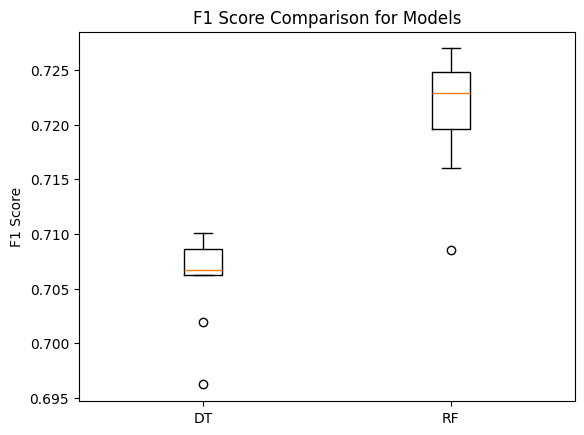

In [155]:
plt.boxplot(train_scores)
plt.title('F1 Score Comparison for Models')
plt.ylabel('F1 Score')
ax = plt.subplot()
ax.set_xticklabels(names)

<h2>Validation Using Test Data</h2>

In [162]:
precision_scores=[]
recall_scores=[]
f1_scores=[]
f1_macro=[]
accuracy_scores=[]
m=[]

def score_model(model_name, trained_model):    
    y_pred = trained_model.predict(X_test)   
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    f1_macro.append(f1_score(y_test, y_pred, average='macro'))
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    m.append(model_name)
    print('{}:'.format(trained_model))
    print(classification_report(y_test, y_pred))

In [163]:
#Decision Tree 
# DT_model = DecisionTreeClassifier()
DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=15)
DT_model.fit(X_train, y_train) 
print(classification_report(y_train, DT_model.predict(X_train)))
# score_model('Decision Tree_Test', DT_model)
score_model('Decision Tree_Test(Tuned)', DT_model)

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.81     35294
         1.0       0.84      0.75      0.79     35294

    accuracy                           0.80     70588
   macro avg       0.81      0.80      0.80     70588
weighted avg       0.81      0.80      0.80     70588

DecisionTreeClassifier(criterion='entropy', max_depth=15):
              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76     14948
         1.0       0.60      0.66      0.63      8930

    accuracy                           0.71     23878
   macro avg       0.69      0.70      0.70     23878
weighted avg       0.72      0.71      0.71     23878



In [164]:
#Random Forest
# RF_model = RandomForestClassifier()
RF_model = RandomForestClassifier(max_depth=15, n_estimators=15)
RF_model.fit(X_train, y_train) 
print(classification_report(y_train, RF_model.predict(X_train)))
# score_model('Random Forest_test', RF_model)
score_model('Random Forest_Test(Tuned)', RF_model)

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83     35294
         1.0       0.84      0.79      0.81     35294

    accuracy                           0.82     70588
   macro avg       0.82      0.82      0.82     70588
weighted avg       0.82      0.82      0.82     70588

RandomForestClassifier(max_depth=15, n_estimators=15):
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.79     14948
         1.0       0.64      0.67      0.65      8930

    accuracy                           0.73     23878
   macro avg       0.72      0.72      0.72     23878
weighted avg       0.74      0.73      0.74     23878



In [165]:
print('Scores Comparison for Class 1 Prediction (Customers who are interested):')
pd.DataFrame({
    'Name': m,
    'Precision Score':[round(s,2) for s in precision_scores],
    'Recall Score':[round(s,2) for s in recall_scores],
    'F1 Score':[round(s,2) for s in f1_scores],
    'Accuracy Score':[round(s,2) for s in accuracy_scores],
    'F1 Macro':[round(s,2) for s in f1_macro]
})

Scores Comparison for Class 1 Prediction (Customers who are interested):


,Name,Precision Score,Recall Score,F1 Score,Accuracy Score,F1 Macro
0,Decision Tree_Test(Tuned),0.60,0.66,0.63,0.71,0.70
1,Random Forest_Test(Tuned),0.64,0.67,0.65,0.73,0.72


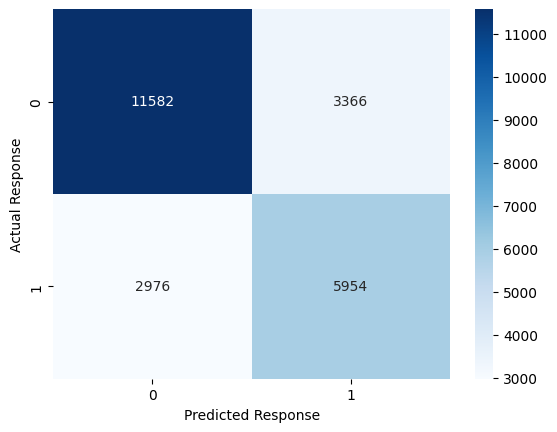

In [166]:
y_pred = RF_model.predict(X_test)
draw_matrix(y_pred)

<h2>Feature Importance</h2>

<Axes: ylabel='None'>

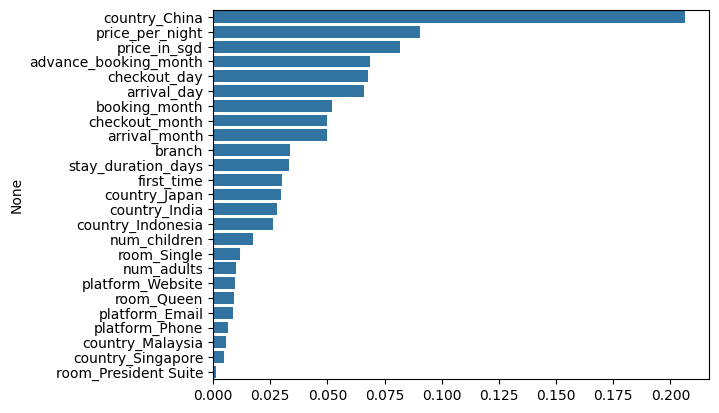

In [168]:
feature_name_sorted = []
feature_sorted = sorted(list(zip(RF_model.feature_names_in_,RF_model.feature_importances_)),key=lambda x: x[1], reverse=True)
for name,score in feature_sorted:
    feature_name_sorted.append(name)
    
sns.barplot(x=RF_model.feature_importances_ , y=X_train.columns, order=feature_name_sorted)

<h2>Predict</h2>

In [173]:
record = X.iloc[1:2]
#print('LR prediction: Response will be {}'.format(Logistic_model.predict(record)))
print(f'DT prediction: Response will be {DT_model.predict(record)}, Actual Data: {y.iloc[1:2]}')
print(f'RF prediction: Response will be {RF_model.predict(record)}, Actual Data: {y.iloc[1:2]}')

DT prediction: Response will be [0.], Actual Data: 1   0.00
Name: no_show, dtype: float64
RF prediction: Response will be [0.], Actual Data: 1   0.00
Name: no_show, dtype: float64
